In [3]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 3.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.9 MB/s eta 0:

In [1]:
pip install tensorflow[keras]

zsh:1: no matches found: tensorflow[keras]
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
# basics
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

import pickle 

# Keras Libraries
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.metrics import AUC
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import keras.backend

In [2]:
# Set a seed value
seed_value= 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# 5. For layers that introduce randomness like dropout, make sure to set seed values 
#model.add(Dropout(0.25, seed=seed_value))


In [3]:
project_path = "/Users/freazx/Documents/ONE TAB/CODING"
train_path = project_path + "/chest_xray/setA/train/"
val_path = project_path + "/chest_xray/setA/val/"
test_path = project_path + "/chest_xray/setA/test/"

In [4]:
hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 100

## Training in grayscale instead of RGB
hyper_channels = 1
hyper_mode = 'grayscale'

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 

train_generator = train_datagen.flow_from_directory(directory = train_path, 
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size, 
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary', 
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path, 
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size, 
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()

Found 4684 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
Found 585 images belonging to 2 classes.


In [6]:
def create_charts(cnn, cnn_model):
    ## Define train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define y_pred & y_true
    y_true = test_generator.classes
    Y_pred = cnn.predict(test_generator, steps=len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    y_pred_prob = Y_pred.T[0]
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
    # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Pneumonia']

    # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
     ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

In [14]:
#Model 1 : Conv2D x 3 + 64 dense units
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))
                                
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=64))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator,
                   epochs=100,
                   validation_data=val_generator,
                   steps_per_epoch=len(train_generator),
                   validation_steps=len(val_generator),
                   verbose=1)

Epoch 1/100


/Users/freazx/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 614ms/step - auc_1: 0.5432 - loss: 0.5904 - val_auc_1: 0.9482 - val_loss: 0.5211
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


2024-03-30 13:56:58.685337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 13:56:58.691256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 589ms/step - auc_1: 0.8552 - loss: 0.4266 - val_auc_1: 0.9402 - val_loss: 0.2623
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100


2024-03-30 13:57:24.631584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 13:57:24.634410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 610ms/step - auc_1: 0.9401 - loss: 0.2814 - val_auc_1: 0.9100 - val_loss: 0.4156
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100


2024-03-30 13:57:51.707803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 13:57:51.710437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 582ms/step - auc_1: 0.9328 - loss: 0.2943 - val_auc_1: 0.9240 - val_loss: 0.2958
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100


2024-03-30 13:58:17.664277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 13:58:17.666738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 601ms/step - auc_1: 0.9632 - loss: 0.2151 - val_auc_1: 0.9354 - val_loss: 0.2915
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100


2024-03-30 13:58:44.104706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 13:58:44.108374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 587ms/step - auc_1: 0.9666 - loss: 0.2087 - val_auc_1: 0.9474 - val_loss: 0.2397
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/100


2024-03-30 13:59:10.540628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 13:59:10.543182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 589ms/step - auc_1: 0.9727 - loss: 0.1885 - val_auc_1: 0.9482 - val_loss: 0.2390
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/100


2024-03-30 13:59:36.355751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 13:59:36.358666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 595ms/step - auc_1: 0.9716 - loss: 0.1893 - val_auc_1: 0.9558 - val_loss: 0.2173
Epoch 16/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/100


2024-03-30 14:00:02.559146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:00:02.561646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 579ms/step - auc_1: 0.9713 - loss: 0.1877 - val_auc_1: 0.9724 - val_loss: 0.1756
Epoch 18/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/100


2024-03-30 14:00:28.178219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:00:28.181045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 591ms/step - auc_1: 0.9734 - loss: 0.1879 - val_auc_1: 0.9667 - val_loss: 0.1921
Epoch 20/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/100


2024-03-30 14:00:54.004013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:00:54.007993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 567ms/step - auc_1: 0.9779 - loss: 0.1670 - val_auc_1: 0.9715 - val_loss: 0.1664
Epoch 22/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100


2024-03-30 14:01:19.348177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:01:19.350795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 605ms/step - auc_1: 0.9794 - loss: 0.1623 - val_auc_1: 0.9677 - val_loss: 0.1901
Epoch 24/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/100


2024-03-30 14:01:45.905205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:01:45.909074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 589ms/step - auc_1: 0.9812 - loss: 0.1536 - val_auc_1: 0.9724 - val_loss: 0.1800
Epoch 26/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/100


2024-03-30 14:02:12.290624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:02:12.292992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 635ms/step - auc_1: 0.9798 - loss: 0.1608 - val_auc_1: 0.9737 - val_loss: 0.1707
Epoch 28/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/100


2024-03-30 14:02:40.619269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:02:40.622289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 585ms/step - auc_1: 0.9826 - loss: 0.1480 - val_auc_1: 0.9698 - val_loss: 0.1851
Epoch 30/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/100


2024-03-30 14:03:06.573278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:03:06.576021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 586ms/step - auc_1: 0.9854 - loss: 0.1315 - val_auc_1: 0.9700 - val_loss: 0.2002
Epoch 32/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/100


2024-03-30 14:03:32.140947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:03:32.145299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 613ms/step - auc_1: 0.9816 - loss: 0.1535 - val_auc_1: 0.9723 - val_loss: 0.2395
Epoch 34/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/100


2024-03-30 14:03:59.142895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:03:59.145566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 592ms/step - auc_1: 0.9823 - loss: 0.1518 - val_auc_1: 0.9779 - val_loss: 0.1469
Epoch 36/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/100


2024-03-30 14:04:25.524392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:04:25.526817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 578ms/step - auc_1: 0.9855 - loss: 0.1353 - val_auc_1: 0.9765 - val_loss: 0.1632
Epoch 38/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/100


2024-03-30 14:04:51.281203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:04:51.283810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 571ms/step - auc_1: 0.9861 - loss: 0.1352 - val_auc_1: 0.9734 - val_loss: 0.2253
Epoch 40/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/100


2024-03-30 14:05:16.893216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:05:16.895683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 575ms/step - auc_1: 0.9819 - loss: 0.1538 - val_auc_1: 0.9718 - val_loss: 0.1922
Epoch 42/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/100


2024-03-30 14:05:42.513462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:05:42.517459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 590ms/step - auc_1: 0.9858 - loss: 0.1353 - val_auc_1: 0.9733 - val_loss: 0.2747
Epoch 44/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/100


2024-03-30 14:06:08.510069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:06:08.513090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 603ms/step - auc_1: 0.9878 - loss: 0.1264 - val_auc_1: 0.9752 - val_loss: 0.1643
Epoch 46/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/100


2024-03-30 14:06:34.926950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:06:34.929516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 602ms/step - auc_1: 0.9861 - loss: 0.1280 - val_auc_1: 0.9742 - val_loss: 0.1709
Epoch 48/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/100


2024-03-30 14:07:01.153269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:07:01.155808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 584ms/step - auc_1: 0.9869 - loss: 0.1285 - val_auc_1: 0.9740 - val_loss: 0.1728
Epoch 50/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/100


2024-03-30 14:07:26.939650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:07:26.942150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 577ms/step - auc_1: 0.9869 - loss: 0.1296 - val_auc_1: 0.9707 - val_loss: 0.2018
Epoch 52/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100


2024-03-30 14:07:52.519842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:07:52.522466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 579ms/step - auc_1: 0.9891 - loss: 0.1125 - val_auc_1: 0.9802 - val_loss: 0.1463
Epoch 54/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100


2024-03-30 14:08:18.264297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:08:18.267227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 574ms/step - auc_1: 0.9900 - loss: 0.1104 - val_auc_1: 0.9696 - val_loss: 0.2358
Epoch 56/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100


2024-03-30 14:08:43.911170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:08:43.913696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 583ms/step - auc_1: 0.9879 - loss: 0.1219 - val_auc_1: 0.9769 - val_loss: 0.1712
Epoch 58/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/100


2024-03-30 14:09:09.495005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:09:09.497554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 574ms/step - auc_1: 0.9897 - loss: 0.1162 - val_auc_1: 0.9831 - val_loss: 0.1706
Epoch 60/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/100


2024-03-30 14:09:35.289769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:09:35.292333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 591ms/step - auc_1: 0.9888 - loss: 0.1166 - val_auc_1: 0.9789 - val_loss: 0.1540
Epoch 62/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/100


2024-03-30 14:10:01.594155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:10:01.596664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 590ms/step - auc_1: 0.9918 - loss: 0.1046 - val_auc_1: 0.9758 - val_loss: 0.2024
Epoch 64/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/100


2024-03-30 14:10:27.447891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:10:27.450442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 584ms/step - auc_1: 0.9918 - loss: 0.1001 - val_auc_1: 0.9745 - val_loss: 0.2382
Epoch 66/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/100


2024-03-30 14:10:53.399189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:10:53.401918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 577ms/step - auc_1: 0.9907 - loss: 0.1098 - val_auc_1: 0.9838 - val_loss: 0.1393
Epoch 68/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/100


2024-03-30 14:11:18.996058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:11:18.998721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 573ms/step - auc_1: 0.9890 - loss: 0.1189 - val_auc_1: 0.9780 - val_loss: 0.1872
Epoch 70/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/100


2024-03-30 14:11:44.682275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:11:44.685057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 581ms/step - auc_1: 0.9921 - loss: 0.0964 - val_auc_1: 0.9830 - val_loss: 0.1531
Epoch 72/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/100


2024-03-30 14:12:10.506847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:12:10.509523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 597ms/step - auc_1: 0.9893 - loss: 0.1131 - val_auc_1: 0.9764 - val_loss: 0.2009
Epoch 74/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/100


2024-03-30 14:12:36.835480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:12:36.838066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 581ms/step - auc_1: 0.9927 - loss: 0.0974 - val_auc_1: 0.9848 - val_loss: 0.1416
Epoch 76/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100


2024-03-30 14:13:02.686859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:13:02.690594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 584ms/step - auc_1: 0.9925 - loss: 0.0969 - val_auc_1: 0.9796 - val_loss: 0.1754
Epoch 78/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100


2024-03-30 14:13:28.829935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:13:28.832634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 583ms/step - auc_1: 0.9910 - loss: 0.0993 - val_auc_1: 0.9772 - val_loss: 0.1823
Epoch 80/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100


2024-03-30 14:13:54.705398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:13:54.708429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 587ms/step - auc_1: 0.9906 - loss: 0.1071 - val_auc_1: 0.9860 - val_loss: 0.1290
Epoch 82/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100


2024-03-30 14:14:20.713391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:14:20.715844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 585ms/step - auc_1: 0.9919 - loss: 0.0935 - val_auc_1: 0.9836 - val_loss: 0.1336
Epoch 84/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100


2024-03-30 14:14:46.544472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:14:46.547318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 574ms/step - auc_1: 0.9878 - loss: 0.1237 - val_auc_1: 0.9734 - val_loss: 0.1670
Epoch 86/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/100


2024-03-30 14:15:12.174481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:15:12.177541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 578ms/step - auc_1: 0.9929 - loss: 0.0929 - val_auc_1: 0.9793 - val_loss: 0.1499
Epoch 88/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/100


2024-03-30 14:15:37.773080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:15:37.775624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 577ms/step - auc_1: 0.9928 - loss: 0.0937 - val_auc_1: 0.9786 - val_loss: 0.1480
Epoch 90/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/100


2024-03-30 14:16:03.385656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:16:03.388474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 572ms/step - auc_1: 0.9904 - loss: 0.1055 - val_auc_1: 0.9785 - val_loss: 0.1484
Epoch 92/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/100


2024-03-30 14:16:28.946235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:16:28.948659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 578ms/step - auc_1: 0.9912 - loss: 0.1079 - val_auc_1: 0.9864 - val_loss: 0.1533
Epoch 94/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/100


2024-03-30 14:16:54.915979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:16:54.918592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 593ms/step - auc_1: 0.9897 - loss: 0.1079 - val_auc_1: 0.9792 - val_loss: 0.1681
Epoch 96/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/100


2024-03-30 14:17:21.148292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:17:21.151530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 624ms/step - auc_1: 0.9911 - loss: 0.1033 - val_auc_1: 0.9714 - val_loss: 0.2162
Epoch 98/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/100


2024-03-30 14:17:48.305133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:17:48.307749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 575ms/step - auc_1: 0.9896 - loss: 0.1115 - val_auc_1: 0.9781 - val_loss: 0.1499
Epoch 100/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 14:18:13.936967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:18:13.940256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step
[Summary Statistics]
Accuracy = 91.79% | Precision = 90.75% | Recall = 98.83% | Specificity = 72.78% | F1 Score = 94.62%


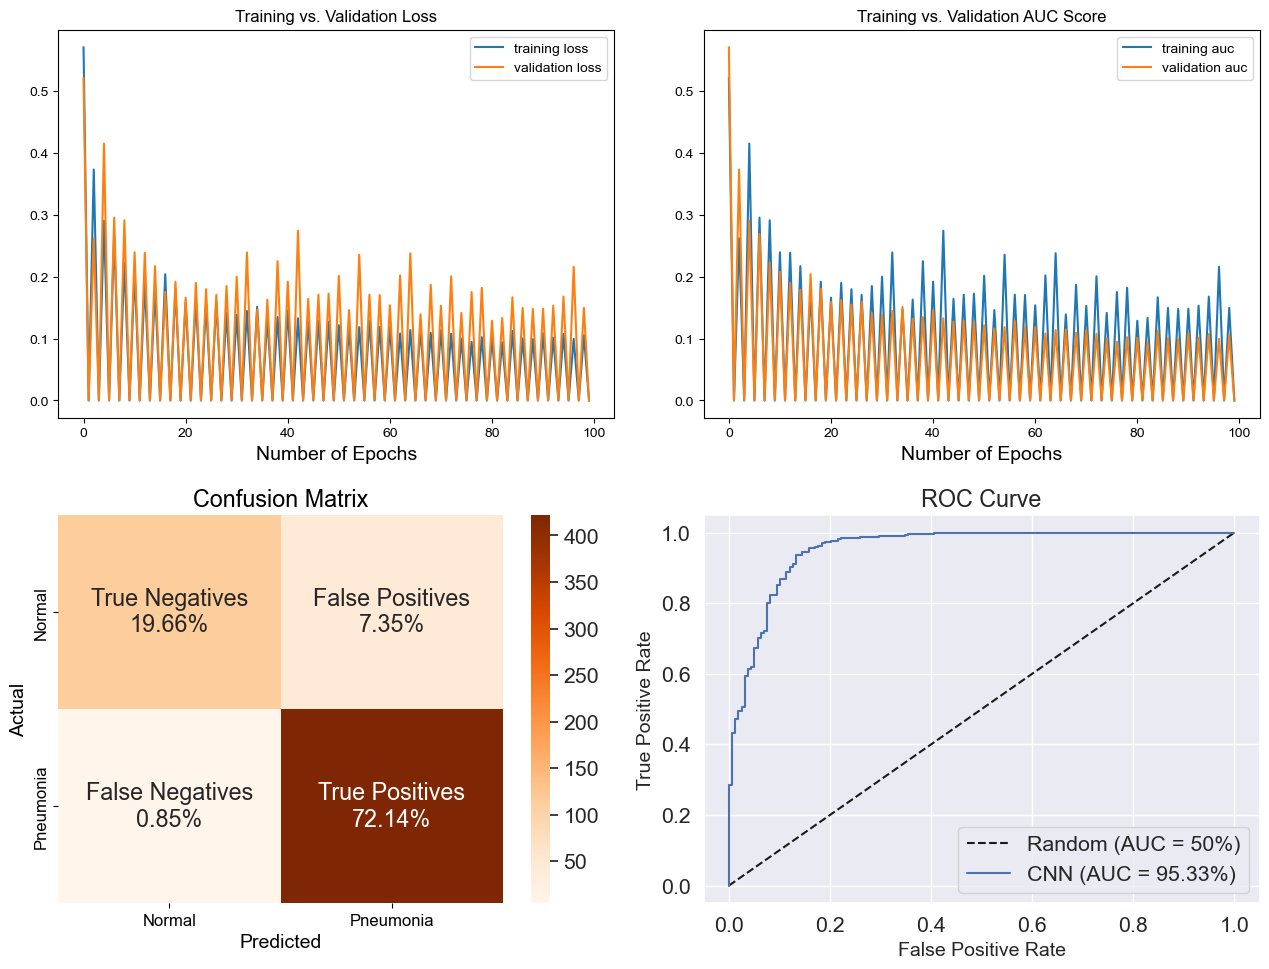

In [17]:
create_charts(cnn, cnn_model)

In [23]:
#Model 2:- Conv2D x 4 + 64 dense units.
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=64))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 100, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator))

/Users/freazx/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 612ms/step - auc_2: 0.5279 - loss: 0.6107 - val_auc_2: 0.9434 - val_loss: 0.5349
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 14:33:30.230890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:33:30.234440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 578ms/step - auc_2: 0.8422 - loss: 0.4557 - val_auc_2: 0.9543 - val_loss: 0.3658
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100


2024-03-30 14:33:55.802557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:33:55.805903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 624ms/step - auc_2: 0.9221 - loss: 0.3220 - val_auc_2: 0.9582 - val_loss: 0.3333
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100


2024-03-30 14:34:23.406830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:34:23.411069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 611ms/step - auc_2: 0.9450 - loss: 0.2769 - val_auc_2: 0.9615 - val_loss: 0.2111
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100


2024-03-30 14:34:50.787638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:34:50.790791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 588ms/step - auc_2: 0.9598 - loss: 0.2323 - val_auc_2: 0.9631 - val_loss: 0.2097
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100


2024-03-30 14:35:17.299504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:35:17.302215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 584ms/step - auc_2: 0.9534 - loss: 0.2482 - val_auc_2: 0.9635 - val_loss: 0.2689
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/100


2024-03-30 14:35:43.012191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:35:43.015323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 600ms/step - auc_2: 0.9642 - loss: 0.2155 - val_auc_2: 0.9646 - val_loss: 0.2016
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/100


2024-03-30 14:36:09.567723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:36:09.572615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 637ms/step - auc_2: 0.9634 - loss: 0.2212 - val_auc_2: 0.9707 - val_loss: 0.1991
Epoch 16/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/100


2024-03-30 14:36:37.634342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:36:37.637804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 571ms/step - auc_2: 0.9746 - loss: 0.1851 - val_auc_2: 0.9767 - val_loss: 0.1691
Epoch 18/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/100


2024-03-30 14:37:03.034255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:37:03.036781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 575ms/step - auc_2: 0.9784 - loss: 0.1635 - val_auc_2: 0.9770 - val_loss: 0.1969
Epoch 20/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/100


2024-03-30 14:37:28.500823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:37:28.503340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 593ms/step - auc_2: 0.9775 - loss: 0.1722 - val_auc_2: 0.9769 - val_loss: 0.1694
Epoch 22/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100


2024-03-30 14:37:54.680935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:37:54.683747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 595ms/step - auc_2: 0.9817 - loss: 0.1526 - val_auc_2: 0.9822 - val_loss: 0.1679
Epoch 24/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/100


2024-03-30 14:38:21.287354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:38:21.290605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 594ms/step - auc_2: 0.9786 - loss: 0.1657 - val_auc_2: 0.9814 - val_loss: 0.1446
Epoch 26/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/100


2024-03-30 14:38:47.990600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:38:47.993343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 614ms/step - auc_2: 0.9814 - loss: 0.1585 - val_auc_2: 0.9800 - val_loss: 0.1445
Epoch 28/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/100


2024-03-30 14:39:14.783523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:39:14.788000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 602ms/step - auc_2: 0.9851 - loss: 0.1378 - val_auc_2: 0.9806 - val_loss: 0.1917
Epoch 30/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/100


2024-03-30 14:39:41.500423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:39:41.503079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 563ms/step - auc_2: 0.9787 - loss: 0.1720 - val_auc_2: 0.9789 - val_loss: 0.1589
Epoch 32/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/100


2024-03-30 14:40:06.979873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:40:06.982583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 565ms/step - auc_2: 0.9823 - loss: 0.1513 - val_auc_2: 0.9820 - val_loss: 0.1688
Epoch 34/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/100


2024-03-30 14:40:32.214555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:40:32.217182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 569ms/step - auc_2: 0.9838 - loss: 0.1446 - val_auc_2: 0.9791 - val_loss: 0.1681
Epoch 36/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/100


2024-03-30 14:40:57.568940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:40:57.571368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 570ms/step - auc_2: 0.9870 - loss: 0.1285 - val_auc_2: 0.9802 - val_loss: 0.1618
Epoch 38/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/100


2024-03-30 14:41:22.725841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:41:22.728431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 566ms/step - auc_2: 0.9846 - loss: 0.1401 - val_auc_2: 0.9806 - val_loss: 0.1691
Epoch 40/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/100


2024-03-30 14:41:48.114967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:41:48.117450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 562ms/step - auc_2: 0.9868 - loss: 0.1309 - val_auc_2: 0.9783 - val_loss: 0.1613
Epoch 42/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/100


2024-03-30 14:42:13.359484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:42:13.362562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 574ms/step - auc_2: 0.9872 - loss: 0.1305 - val_auc_2: 0.9804 - val_loss: 0.1502
Epoch 44/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/100


2024-03-30 14:42:38.945314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:42:38.948320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 580ms/step - auc_2: 0.9858 - loss: 0.1362 - val_auc_2: 0.9807 - val_loss: 0.1562
Epoch 46/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/100


2024-03-30 14:43:05.126194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:43:05.128895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 593ms/step - auc_2: 0.9879 - loss: 0.1250 - val_auc_2: 0.9798 - val_loss: 0.1792
Epoch 48/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/100


2024-03-30 14:43:31.597392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:43:31.600108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 630ms/step - auc_2: 0.9847 - loss: 0.1309 - val_auc_2: 0.9787 - val_loss: 0.1629
Epoch 50/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/100


2024-03-30 14:43:59.077417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:43:59.079965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 594ms/step - auc_2: 0.9869 - loss: 0.1261 - val_auc_2: 0.9789 - val_loss: 0.1817
Epoch 52/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100


2024-03-30 14:44:25.179933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:44:25.183963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 610ms/step - auc_2: 0.9871 - loss: 0.1295 - val_auc_2: 0.9775 - val_loss: 0.2107
Epoch 54/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100


2024-03-30 14:44:52.652711: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:44:52.655527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 594ms/step - auc_2: 0.9880 - loss: 0.1239 - val_auc_2: 0.9798 - val_loss: 0.1621
Epoch 56/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100


2024-03-30 14:45:19.008979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:45:19.011914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 645ms/step - auc_2: 0.9884 - loss: 0.1157 - val_auc_2: 0.9804 - val_loss: 0.1686
Epoch 58/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/100


2024-03-30 14:45:47.196661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:45:47.199518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 639ms/step - auc_2: 0.9874 - loss: 0.1274 - val_auc_2: 0.9818 - val_loss: 0.2072
Epoch 60/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/100


2024-03-30 14:46:15.573966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:46:15.577112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 573ms/step - auc_2: 0.9867 - loss: 0.1271 - val_auc_2: 0.9786 - val_loss: 0.1844
Epoch 62/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/100


2024-03-30 14:46:41.150409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:46:41.153419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 584ms/step - auc_2: 0.9894 - loss: 0.1180 - val_auc_2: 0.9816 - val_loss: 0.1746
Epoch 64/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/100


2024-03-30 14:47:06.716609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:47:06.719429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 621ms/step - auc_2: 0.9913 - loss: 0.1078 - val_auc_2: 0.9812 - val_loss: 0.1649
Epoch 66/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/100


2024-03-30 14:47:34.012189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:47:34.014934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 573ms/step - auc_2: 0.9892 - loss: 0.1190 - val_auc_2: 0.9789 - val_loss: 0.1648
Epoch 68/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/100


2024-03-30 14:47:59.552090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:47:59.554624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 570ms/step - auc_2: 0.9913 - loss: 0.1042 - val_auc_2: 0.9731 - val_loss: 0.1977
Epoch 70/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/100


2024-03-30 14:48:24.849174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:48:24.852798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 574ms/step - auc_2: 0.9844 - loss: 0.1428 - val_auc_2: 0.9762 - val_loss: 0.2003
Epoch 72/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/100


2024-03-30 14:48:50.098480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:48:50.101633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 574ms/step - auc_2: 0.9893 - loss: 0.1175 - val_auc_2: 0.9786 - val_loss: 0.1817
Epoch 74/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/100


2024-03-30 14:49:15.556670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:49:15.559282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 567ms/step - auc_2: 0.9923 - loss: 0.0942 - val_auc_2: 0.9799 - val_loss: 0.1745
Epoch 76/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100


2024-03-30 14:49:41.081542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:49:41.084123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 567ms/step - auc_2: 0.9900 - loss: 0.1090 - val_auc_2: 0.9821 - val_loss: 0.1482
Epoch 78/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100


2024-03-30 14:50:06.552380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:50:06.555100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 576ms/step - auc_2: 0.9917 - loss: 0.1065 - val_auc_2: 0.9800 - val_loss: 0.1620
Epoch 80/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100


2024-03-30 14:50:32.067591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:50:32.070241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 571ms/step - auc_2: 0.9903 - loss: 0.1120 - val_auc_2: 0.9791 - val_loss: 0.1884
Epoch 82/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100


2024-03-30 14:50:57.594353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:50:57.596819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 598ms/step - auc_2: 0.9916 - loss: 0.1018 - val_auc_2: 0.9806 - val_loss: 0.1567
Epoch 84/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100


2024-03-30 14:51:24.236263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:51:24.239069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 572ms/step - auc_2: 0.9912 - loss: 0.1043 - val_auc_2: 0.9786 - val_loss: 0.2017
Epoch 86/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/100


2024-03-30 14:51:49.700855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:51:49.704258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 578ms/step - auc_2: 0.9921 - loss: 0.1008 - val_auc_2: 0.9793 - val_loss: 0.1698
Epoch 88/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/100


2024-03-30 14:52:15.149703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:52:15.152342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 565ms/step - auc_2: 0.9928 - loss: 0.0982 - val_auc_2: 0.9820 - val_loss: 0.1592
Epoch 90/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/100


2024-03-30 14:52:40.482823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:52:40.485399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 576ms/step - auc_2: 0.9902 - loss: 0.1050 - val_auc_2: 0.9815 - val_loss: 0.1498
Epoch 92/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/100


2024-03-30 14:53:05.966254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:53:05.968746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 576ms/step - auc_2: 0.9902 - loss: 0.1112 - val_auc_2: 0.9828 - val_loss: 0.1482
Epoch 94/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/100


2024-03-30 14:53:31.553640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:53:31.556320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 575ms/step - auc_2: 0.9911 - loss: 0.1024 - val_auc_2: 0.9813 - val_loss: 0.1710
Epoch 96/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/100


2024-03-30 14:53:56.950075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:53:56.952843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 571ms/step - auc_2: 0.9900 - loss: 0.1104 - val_auc_2: 0.9828 - val_loss: 0.1504
Epoch 98/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/100


2024-03-30 14:54:22.475275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:54:22.478029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 567ms/step - auc_2: 0.9912 - loss: 0.1052 - val_auc_2: 0.9816 - val_loss: 0.1548
Epoch 100/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 14:54:47.814738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 14:54:47.817616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step
[Summary Statistics]
Accuracy = 90.26% | Precision = 89.36% | Recall = 98.36% | Specificity = 68.35% | F1 Score = 93.65%


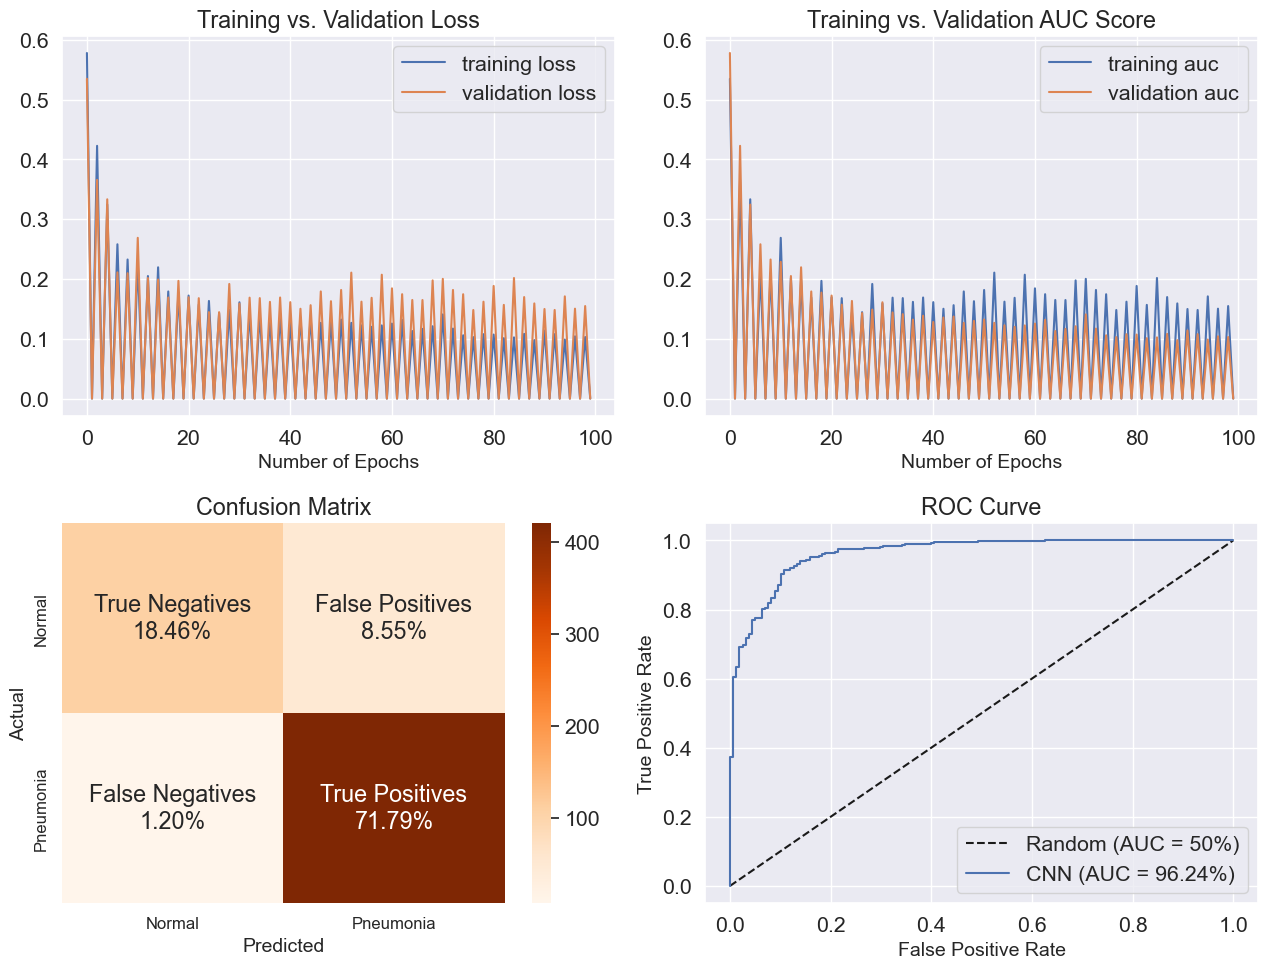

In [24]:
create_charts(cnn, cnn_model)

In [ ]:
cnn = Sequential()
cnn.add(InputLayer(shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=64))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 100, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/100


In [8]:
cnn = Sequential()
cnn.add(InputLayer(shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=64))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 100, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/100


/Users/freazx/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 - 27s - 730ms/step - auc: 0.7188 - loss: 0.5274 - val_auc: 0.9640 - val_loss: 0.3781
Epoch 2/100
37/37 - 0s - 377us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


2024-03-30 15:43:56.208083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 15:43:56.212560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc: 0.9365 - loss: 0.2911 - val_auc: 0.9686 - val_loss: 0.2078
Epoch 4/100
37/37 - 0s - 221us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100


2024-03-30 15:44:21.306439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:44:21.309316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 705ms/step - auc: 0.9567 - loss: 0.2357 - val_auc: 0.9672 - val_loss: 0.3489
Epoch 6/100
37/37 - 0s - 201us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100


2024-03-30 15:44:47.404992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:44:47.407848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 804ms/step - auc: 0.9595 - loss: 0.2300 - val_auc: 0.9682 - val_loss: 0.1900
Epoch 8/100
37/37 - 0s - 274us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100


2024-03-30 15:45:17.172726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:45:17.176390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 752ms/step - auc: 0.9731 - loss: 0.1880 - val_auc: 0.9710 - val_loss: 0.1819
Epoch 10/100
37/37 - 0s - 199us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100


2024-03-30 15:45:45.011878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:45:45.014442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 691ms/step - auc: 0.9661 - loss: 0.2098 - val_auc: 0.9715 - val_loss: 0.1883
Epoch 12/100
37/37 - 0s - 199us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/100


2024-03-30 15:46:10.578464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:46:10.581321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 693ms/step - auc: 0.9738 - loss: 0.1849 - val_auc: 0.9771 - val_loss: 0.1737
Epoch 14/100
37/37 - 0s - 221us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/100


2024-03-30 15:46:36.215324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:46:36.218357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 689ms/step - auc: 0.9778 - loss: 0.1694 - val_auc: 0.9763 - val_loss: 0.1586
Epoch 16/100
37/37 - 0s - 218us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/100


2024-03-30 15:47:01.731627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:47:01.734723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 695ms/step - auc: 0.9716 - loss: 0.1882 - val_auc: 0.9755 - val_loss: 0.1786
Epoch 18/100
37/37 - 0s - 375us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/100


2024-03-30 15:47:27.476080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:47:27.482938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 687ms/step - auc: 0.9769 - loss: 0.1704 - val_auc: 0.9785 - val_loss: 0.1870
Epoch 20/100
37/37 - 0s - 217us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/100


2024-03-30 15:47:52.915671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:47:52.918688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 690ms/step - auc: 0.9792 - loss: 0.1627 - val_auc: 0.9769 - val_loss: 0.1637
Epoch 22/100
37/37 - 0s - 218us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100


2024-03-30 15:48:18.448126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:48:18.451531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 713ms/step - auc: 0.9839 - loss: 0.1447 - val_auc: 0.9807 - val_loss: 0.1504
Epoch 24/100
37/37 - 0s - 219us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/100


2024-03-30 15:48:44.851696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:48:44.854879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 707ms/step - auc: 0.9812 - loss: 0.1550 - val_auc: 0.9786 - val_loss: 0.1963
Epoch 26/100
37/37 - 0s - 201us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/100


2024-03-30 15:49:11.030468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:49:11.033085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 690ms/step - auc: 0.9813 - loss: 0.1548 - val_auc: 0.9808 - val_loss: 0.1512
Epoch 28/100
37/37 - 0s - 211us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/100


2024-03-30 15:49:36.559047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:49:36.562049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 696ms/step - auc: 0.9834 - loss: 0.1441 - val_auc: 0.9798 - val_loss: 0.1770
Epoch 30/100
37/37 - 0s - 238us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/100


2024-03-30 15:50:02.309989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:50:02.313033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 684ms/step - auc: 0.9856 - loss: 0.1365 - val_auc: 0.9768 - val_loss: 0.1819
Epoch 32/100
37/37 - 0s - 196us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/100


2024-03-30 15:50:27.634307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:50:27.637163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 695ms/step - auc: 0.9854 - loss: 0.1363 - val_auc: 0.9849 - val_loss: 0.1396
Epoch 34/100
37/37 - 0s - 221us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/100


2024-03-30 15:50:53.346564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:50:53.349415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 698ms/step - auc: 0.9855 - loss: 0.1325 - val_auc: 0.9843 - val_loss: 0.1355
Epoch 36/100
37/37 - 0s - 262us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/100


2024-03-30 15:51:19.165395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:51:19.170282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 725ms/step - auc: 0.9856 - loss: 0.1304 - val_auc: 0.9833 - val_loss: 0.1462
Epoch 38/100
37/37 - 0s - 191us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/100


2024-03-30 15:51:46.006531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:51:46.008950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 698ms/step - auc: 0.9818 - loss: 0.1512 - val_auc: 0.9712 - val_loss: 0.3091
Epoch 40/100
37/37 - 0s - 215us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/100


2024-03-30 15:52:11.852951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:52:11.856022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 702ms/step - auc: 0.9839 - loss: 0.1423 - val_auc: 0.9816 - val_loss: 0.1546
Epoch 42/100
37/37 - 0s - 224us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/100


2024-03-30 15:52:37.838404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:52:37.841543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 702ms/step - auc: 0.9863 - loss: 0.1297 - val_auc: 0.9836 - val_loss: 0.1393
Epoch 44/100
37/37 - 0s - 229us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/100


2024-03-30 15:53:03.835569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:53:03.838782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 695ms/step - auc: 0.9891 - loss: 0.1165 - val_auc: 0.9784 - val_loss: 0.1583
Epoch 46/100
37/37 - 0s - 198us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/100


2024-03-30 15:53:29.552894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:53:29.555389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 692ms/step - auc: 0.9861 - loss: 0.1330 - val_auc: 0.9797 - val_loss: 0.1843
Epoch 48/100
37/37 - 0s - 204us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/100


2024-03-30 15:53:55.161895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:53:55.164865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 706ms/step - auc: 0.9862 - loss: 0.1301 - val_auc: 0.9837 - val_loss: 0.1535
Epoch 50/100
37/37 - 0s - 206us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/100


2024-03-30 15:54:21.300962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:54:21.303777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 685ms/step - auc: 0.9885 - loss: 0.1205 - val_auc: 0.9725 - val_loss: 0.1986
Epoch 52/100
37/37 - 0s - 196us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100


2024-03-30 15:54:46.665276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:54:46.667805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 684ms/step - auc: 0.9884 - loss: 0.1195 - val_auc: 0.9835 - val_loss: 0.1415
Epoch 54/100
37/37 - 0s - 203us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100


2024-03-30 15:55:11.980178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:55:11.983170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 697ms/step - auc: 0.9883 - loss: 0.1194 - val_auc: 0.9811 - val_loss: 0.1518
Epoch 56/100
37/37 - 0s - 435us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100


2024-03-30 15:55:37.766854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:55:37.770695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 745ms/step - auc: 0.9869 - loss: 0.1301 - val_auc: 0.9830 - val_loss: 0.1622
Epoch 58/100
37/37 - 0s - 205us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/100


2024-03-30 15:56:05.348457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:56:05.351117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 705ms/step - auc: 0.9884 - loss: 0.1193 - val_auc: 0.9853 - val_loss: 0.1352
Epoch 60/100
37/37 - 0s - 220us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/100


2024-03-30 15:56:31.434846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:56:31.438349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 699ms/step - auc: 0.9896 - loss: 0.1145 - val_auc: 0.9863 - val_loss: 0.1301
Epoch 62/100
37/37 - 0s - 195us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/100


2024-03-30 15:56:57.323633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:56:57.326076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 703ms/step - auc: 0.9899 - loss: 0.1093 - val_auc: 0.9861 - val_loss: 0.1371
Epoch 64/100
37/37 - 0s - 204us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/100


2024-03-30 15:57:23.349391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:57:23.352295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 697ms/step - auc: 0.9889 - loss: 0.1121 - val_auc: 0.9835 - val_loss: 0.1714
Epoch 66/100
37/37 - 0s - 205us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/100


2024-03-30 15:57:49.156164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:57:49.159049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 702ms/step - auc: 0.9911 - loss: 0.1065 - val_auc: 0.9839 - val_loss: 0.2069
Epoch 68/100
37/37 - 0s - 235us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/100


2024-03-30 15:58:15.131273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:58:15.134175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 693ms/step - auc: 0.9904 - loss: 0.1085 - val_auc: 0.9866 - val_loss: 0.1761
Epoch 70/100
37/37 - 0s - 206us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/100


2024-03-30 15:58:40.799402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:58:40.802087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 694ms/step - auc: 0.9899 - loss: 0.1122 - val_auc: 0.9880 - val_loss: 0.1265
Epoch 72/100
37/37 - 0s - 216us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/100


2024-03-30 15:59:06.484302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:59:06.486958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 708ms/step - auc: 0.9903 - loss: 0.1058 - val_auc: 0.9814 - val_loss: 0.1723
Epoch 74/100
37/37 - 0s - 210us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/100


2024-03-30 15:59:32.678136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:59:32.681303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 709ms/step - auc: 0.9915 - loss: 0.1033 - val_auc: 0.9878 - val_loss: 0.1353
Epoch 76/100
37/37 - 0s - 203us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100


2024-03-30 15:59:58.912527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 15:59:58.915071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 715ms/step - auc: 0.9923 - loss: 0.0936 - val_auc: 0.9891 - val_loss: 0.1250
Epoch 78/100
37/37 - 0s - 203us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100


2024-03-30 16:00:25.366616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:00:25.369446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 705ms/step - auc: 0.9922 - loss: 0.0987 - val_auc: 0.9897 - val_loss: 0.1210
Epoch 80/100
37/37 - 0s - 218us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100


2024-03-30 16:00:51.468981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:00:51.471865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 704ms/step - auc: 0.9916 - loss: 0.0985 - val_auc: 0.9898 - val_loss: 0.1111
Epoch 82/100
37/37 - 0s - 193us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100


2024-03-30 16:01:17.511763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:01:17.514324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 698ms/step - auc: 0.9932 - loss: 0.0923 - val_auc: 0.9897 - val_loss: 0.1156
Epoch 84/100
37/37 - 0s - 195us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100


2024-03-30 16:01:43.340448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:01:43.343069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 701ms/step - auc: 0.9896 - loss: 0.1086 - val_auc: 0.9899 - val_loss: 0.1144
Epoch 86/100
37/37 - 0s - 199us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/100


2024-03-30 16:02:09.294845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:02:09.297485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 700ms/step - auc: 0.9915 - loss: 0.0967 - val_auc: 0.9873 - val_loss: 0.1697
Epoch 88/100
37/37 - 0s - 230us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/100


2024-03-30 16:02:35.196930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:02:35.200922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 710ms/step - auc: 0.9906 - loss: 0.1017 - val_auc: 0.9894 - val_loss: 0.1168
Epoch 90/100
37/37 - 0s - 205us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/100


2024-03-30 16:03:01.493663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:03:01.496235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 705ms/step - auc: 0.9904 - loss: 0.1121 - val_auc: 0.9878 - val_loss: 0.1323
Epoch 92/100
37/37 - 0s - 203us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/100


2024-03-30 16:03:27.583643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:03:27.586390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 698ms/step - auc: 0.9923 - loss: 0.0956 - val_auc: 0.9920 - val_loss: 0.1828
Epoch 94/100
37/37 - 0s - 191us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/100


2024-03-30 16:03:53.420517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:03:53.423043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 698ms/step - auc: 0.9911 - loss: 0.1058 - val_auc: 0.9840 - val_loss: 0.2098
Epoch 96/100
37/37 - 0s - 213us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/100


2024-03-30 16:04:19.260520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:04:19.263651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 696ms/step - auc: 0.9937 - loss: 0.0882 - val_auc: 0.9874 - val_loss: 0.1552
Epoch 98/100
37/37 - 0s - 193us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/100


2024-03-30 16:04:45.032845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:04:45.035330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 702ms/step - auc: 0.9904 - loss: 0.1094 - val_auc: 0.9890 - val_loss: 0.1120
Epoch 100/100
37/37 - 0s - 226us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 16:05:10.998792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:05:11.002051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step
[Summary Statistics]
Accuracy = 90.94% | Precision = 90.65% | Recall = 97.66% | Specificity = 72.78% | F1 Score = 94.02%


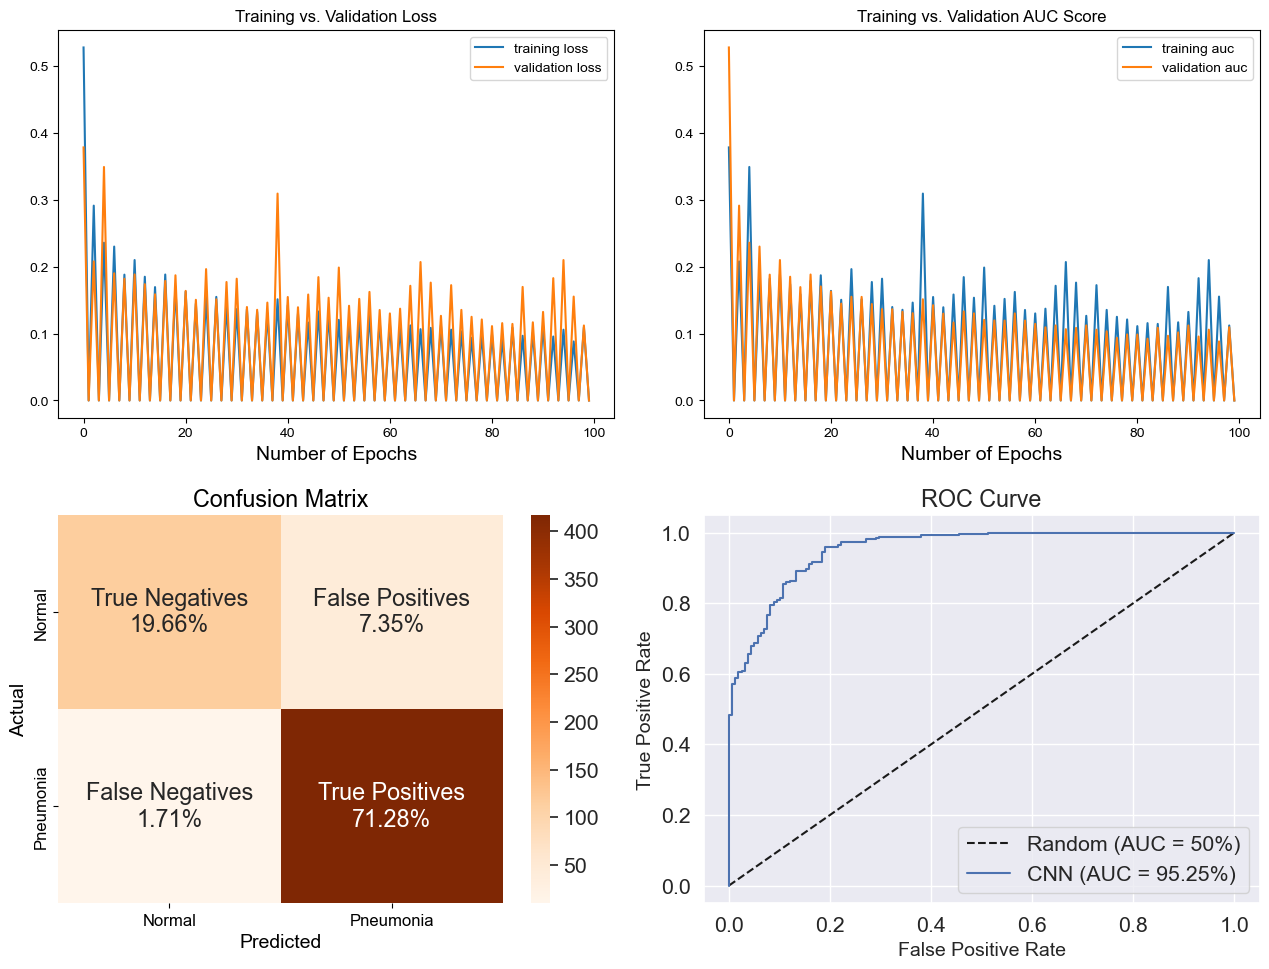

In [9]:
create_charts(cnn, cnn_model)

In [11]:
# Conv2D x 3 + 128 dense units
hyper_feature_maps = 32
cnn = Sequential()
cnn.add(InputLayer(shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=hyper_feature_maps, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=hyper_feature_maps, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=hyper_feature_maps, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 100, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/100
37/37 - 28s - 751ms/step - auc_1: 0.6429 - loss: 0.5589 - val_auc_1: 0.9448 - val_loss: 0.4401
Epoch 2/100
37/37 - 0s - 357us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


2024-03-30 16:16:03.906511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 16:16:03.910630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 707ms/step - auc_1: 0.9031 - loss: 0.3574 - val_auc_1: 0.9570 - val_loss: 0.3641
Epoch 4/100
37/37 - 0s - 226us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100


2024-03-30 16:16:30.067305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:16:30.070184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 714ms/step - auc_1: 0.9481 - loss: 0.2588 - val_auc_1: 0.9563 - val_loss: 0.2324
Epoch 6/100
37/37 - 0s - 237us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100


2024-03-30 16:16:56.509901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:16:56.513149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 709ms/step - auc_1: 0.9618 - loss: 0.2229 - val_auc_1: 0.9613 - val_loss: 0.2277
Epoch 8/100
37/37 - 0s - 257us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100


2024-03-30 16:17:22.762412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:17:22.766259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 693ms/step - auc_1: 0.9668 - loss: 0.2071 - val_auc_1: 0.9503 - val_loss: 0.2609
Epoch 10/100
37/37 - 0s - 240us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100


2024-03-30 16:17:48.409567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:17:48.412438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 690ms/step - auc_1: 0.9643 - loss: 0.2155 - val_auc_1: 0.9302 - val_loss: 0.4971
Epoch 12/100
37/37 - 0s - 195us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/100


2024-03-30 16:18:13.969388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:18:13.971899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 686ms/step - auc_1: 0.9647 - loss: 0.2118 - val_auc_1: 0.9536 - val_loss: 0.2759
Epoch 14/100
37/37 - 0s - 210us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/100


2024-03-30 16:18:39.372194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:18:39.375072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_1: 0.9680 - loss: 0.2047 - val_auc_1: 0.9590 - val_loss: 0.2267
Epoch 16/100
37/37 - 0s - 189us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/100


2024-03-30 16:19:04.455252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:19:04.457761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 679ms/step - auc_1: 0.9773 - loss: 0.1705 - val_auc_1: 0.9728 - val_loss: 0.1669
Epoch 18/100
37/37 - 0s - 210us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/100


2024-03-30 16:19:29.575815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:19:29.578671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 684ms/step - auc_1: 0.9728 - loss: 0.1863 - val_auc_1: 0.9740 - val_loss: 0.1697
Epoch 20/100
37/37 - 0s - 193us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/100


2024-03-30 16:19:54.875877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:19:54.878621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 676ms/step - auc_1: 0.9779 - loss: 0.1680 - val_auc_1: 0.9690 - val_loss: 0.1841
Epoch 22/100
37/37 - 0s - 199us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100


2024-03-30 16:20:19.898866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:20:19.901439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 679ms/step - auc_1: 0.9820 - loss: 0.1509 - val_auc_1: 0.9681 - val_loss: 0.1908
Epoch 24/100
37/37 - 0s - 198us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/100


2024-03-30 16:20:45.028406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:20:45.031011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 675ms/step - auc_1: 0.9795 - loss: 0.1581 - val_auc_1: 0.9697 - val_loss: 0.1822
Epoch 26/100
37/37 - 0s - 190us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/100


2024-03-30 16:21:10.029453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:21:10.032012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 677ms/step - auc_1: 0.9842 - loss: 0.1421 - val_auc_1: 0.9758 - val_loss: 0.1597
Epoch 28/100
37/37 - 0s - 196us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/100


2024-03-30 16:21:35.093247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:21:35.095957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 676ms/step - auc_1: 0.9828 - loss: 0.1460 - val_auc_1: 0.9697 - val_loss: 0.2029
Epoch 30/100
37/37 - 0s - 201us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/100


2024-03-30 16:22:00.097989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:22:00.100686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 683ms/step - auc_1: 0.9819 - loss: 0.1515 - val_auc_1: 0.9715 - val_loss: 0.1766
Epoch 32/100
37/37 - 0s - 187us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/100


2024-03-30 16:22:25.364598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:22:25.367112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 677ms/step - auc_1: 0.9843 - loss: 0.1393 - val_auc_1: 0.9764 - val_loss: 0.2049
Epoch 34/100
37/37 - 0s - 190us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/100


2024-03-30 16:22:50.423658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:22:50.426062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 677ms/step - auc_1: 0.9831 - loss: 0.1460 - val_auc_1: 0.9656 - val_loss: 0.1995
Epoch 36/100
37/37 - 0s - 187us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/100


2024-03-30 16:23:15.483339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:23:15.485962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 679ms/step - auc_1: 0.9856 - loss: 0.1284 - val_auc_1: 0.9700 - val_loss: 0.1923
Epoch 38/100
37/37 - 0s - 200us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/100


2024-03-30 16:23:40.617028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:23:40.619643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 676ms/step - auc_1: 0.9851 - loss: 0.1360 - val_auc_1: 0.9755 - val_loss: 0.1979
Epoch 40/100
37/37 - 0s - 195us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/100


2024-03-30 16:24:05.621120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:24:05.623570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 679ms/step - auc_1: 0.9880 - loss: 0.1232 - val_auc_1: 0.9688 - val_loss: 0.2125
Epoch 42/100
37/37 - 0s - 188us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/100


2024-03-30 16:24:30.762527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:24:30.765084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 679ms/step - auc_1: 0.9859 - loss: 0.1348 - val_auc_1: 0.9763 - val_loss: 0.1616
Epoch 44/100
37/37 - 0s - 189us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/100


2024-03-30 16:24:55.905656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:24:55.908118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_1: 0.9871 - loss: 0.1279 - val_auc_1: 0.9739 - val_loss: 0.1666
Epoch 46/100
37/37 - 0s - 197us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/100


2024-03-30 16:25:21.107683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:25:21.110235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 683ms/step - auc_1: 0.9878 - loss: 0.1213 - val_auc_1: 0.9813 - val_loss: 0.1527
Epoch 48/100
37/37 - 0s - 196us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/100


2024-03-30 16:25:46.375866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:25:46.378456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_1: 0.9880 - loss: 0.1206 - val_auc_1: 0.9764 - val_loss: 0.1611
Epoch 50/100
37/37 - 0s - 198us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/100


2024-03-30 16:26:11.475470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:26:11.478184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_1: 0.9878 - loss: 0.1178 - val_auc_1: 0.9748 - val_loss: 0.1989
Epoch 52/100
37/37 - 0s - 205us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100


2024-03-30 16:26:36.686779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:26:36.689736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 673ms/step - auc_1: 0.9889 - loss: 0.1179 - val_auc_1: 0.9706 - val_loss: 0.1950
Epoch 54/100
37/37 - 0s - 191us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100


2024-03-30 16:27:01.614869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:27:01.617285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 677ms/step - auc_1: 0.9888 - loss: 0.1166 - val_auc_1: 0.9745 - val_loss: 0.1669
Epoch 56/100
37/37 - 0s - 199us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100


2024-03-30 16:27:26.661230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:27:26.663986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_1: 0.9873 - loss: 0.1174 - val_auc_1: 0.9803 - val_loss: 0.1523
Epoch 58/100
37/37 - 0s - 196us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/100


2024-03-30 16:27:51.766748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:27:51.769260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_1: 0.9894 - loss: 0.1145 - val_auc_1: 0.9721 - val_loss: 0.2225
Epoch 60/100
37/37 - 0s - 195us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/100


2024-03-30 16:28:16.955530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:28:16.958267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 680ms/step - auc_1: 0.9877 - loss: 0.1246 - val_auc_1: 0.9791 - val_loss: 0.1858
Epoch 62/100
37/37 - 0s - 192us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/100


2024-03-30 16:28:42.120511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:28:42.123068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 679ms/step - auc_1: 0.9866 - loss: 0.1284 - val_auc_1: 0.9804 - val_loss: 0.1539
Epoch 64/100
37/37 - 0s - 189us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/100


2024-03-30 16:29:07.253680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:29:07.256398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_1: 0.9896 - loss: 0.1103 - val_auc_1: 0.9647 - val_loss: 0.2043
Epoch 66/100
37/37 - 0s - 186us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/100


2024-03-30 16:29:32.465991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:29:32.468361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_1: 0.9894 - loss: 0.1149 - val_auc_1: 0.9758 - val_loss: 0.1738
Epoch 68/100
37/37 - 0s - 206us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/100


2024-03-30 16:29:57.551870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:29:57.554446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 680ms/step - auc_1: 0.9902 - loss: 0.1080 - val_auc_1: 0.9675 - val_loss: 0.1998
Epoch 70/100
37/37 - 0s - 189us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/100


2024-03-30 16:30:22.738951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:30:22.741580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_1: 0.9858 - loss: 0.1276 - val_auc_1: 0.9840 - val_loss: 0.1499
Epoch 72/100
37/37 - 0s - 202us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/100


2024-03-30 16:30:47.947483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:30:47.950009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_1: 0.9909 - loss: 0.1041 - val_auc_1: 0.9808 - val_loss: 0.1627
Epoch 74/100
37/37 - 0s - 197us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/100


2024-03-30 16:31:13.057193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:31:13.059812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 676ms/step - auc_1: 0.9914 - loss: 0.1014 - val_auc_1: 0.9606 - val_loss: 0.2665
Epoch 76/100
37/37 - 0s - 191us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100


2024-03-30 16:31:38.076955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:31:38.079526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_1: 0.9903 - loss: 0.1054 - val_auc_1: 0.9799 - val_loss: 0.1538
Epoch 78/100
37/37 - 0s - 192us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100


2024-03-30 16:32:03.154343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:32:03.156993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 682ms/step - auc_1: 0.9911 - loss: 0.1032 - val_auc_1: 0.9749 - val_loss: 0.1772
Epoch 80/100
37/37 - 0s - 197us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100


2024-03-30 16:32:28.414171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:32:28.416669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 716ms/step - auc_1: 0.9922 - loss: 0.0987 - val_auc_1: 0.9823 - val_loss: 0.1953
Epoch 82/100
37/37 - 0s - 233us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100


2024-03-30 16:32:54.929224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:32:54.932380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 704ms/step - auc_1: 0.9920 - loss: 0.0988 - val_auc_1: 0.9817 - val_loss: 0.1673
Epoch 84/100
37/37 - 0s - 200us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100


2024-03-30 16:33:21.000180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:33:21.002892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 687ms/step - auc_1: 0.9904 - loss: 0.1046 - val_auc_1: 0.9715 - val_loss: 0.1700
Epoch 86/100
37/37 - 0s - 273us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/100


2024-03-30 16:33:46.428624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:33:46.431278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 685ms/step - auc_1: 0.9916 - loss: 0.1015 - val_auc_1: 0.9805 - val_loss: 0.1489
Epoch 88/100
37/37 - 0s - 226us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/100


2024-03-30 16:34:11.800535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:34:11.803372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 693ms/step - auc_1: 0.9920 - loss: 0.0971 - val_auc_1: 0.9830 - val_loss: 0.1659
Epoch 90/100
37/37 - 0s - 190us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/100


2024-03-30 16:34:37.466939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:34:37.469665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 694ms/step - auc_1: 0.9899 - loss: 0.1079 - val_auc_1: 0.9557 - val_loss: 0.2516
Epoch 92/100
37/37 - 0s - 200us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/100


2024-03-30 16:35:03.153816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:35:03.156486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 680ms/step - auc_1: 0.9886 - loss: 0.1132 - val_auc_1: 0.9828 - val_loss: 0.1390
Epoch 94/100
37/37 - 0s - 195us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/100


2024-03-30 16:35:28.319988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:35:28.322443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_1: 0.9927 - loss: 0.0924 - val_auc_1: 0.9836 - val_loss: 0.1424
Epoch 96/100
37/37 - 0s - 189us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/100


2024-03-30 16:35:53.536565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:35:53.539012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_1: 0.9926 - loss: 0.0953 - val_auc_1: 0.9790 - val_loss: 0.1504
Epoch 98/100
37/37 - 0s - 197us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/100


2024-03-30 16:36:18.729352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:36:18.731786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 684ms/step - auc_1: 0.9921 - loss: 0.0966 - val_auc_1: 0.9798 - val_loss: 0.1539
Epoch 100/100
37/37 - 0s - 184us/step - auc_1: 0.0000e+00 - loss: 0.0000e+00 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 16:36:44.053575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:36:44.055986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step
[Summary Statistics]
Accuracy = 89.91% | Precision = 90.17% | Recall = 96.72% | Specificity = 71.52% | F1 Score = 93.33%


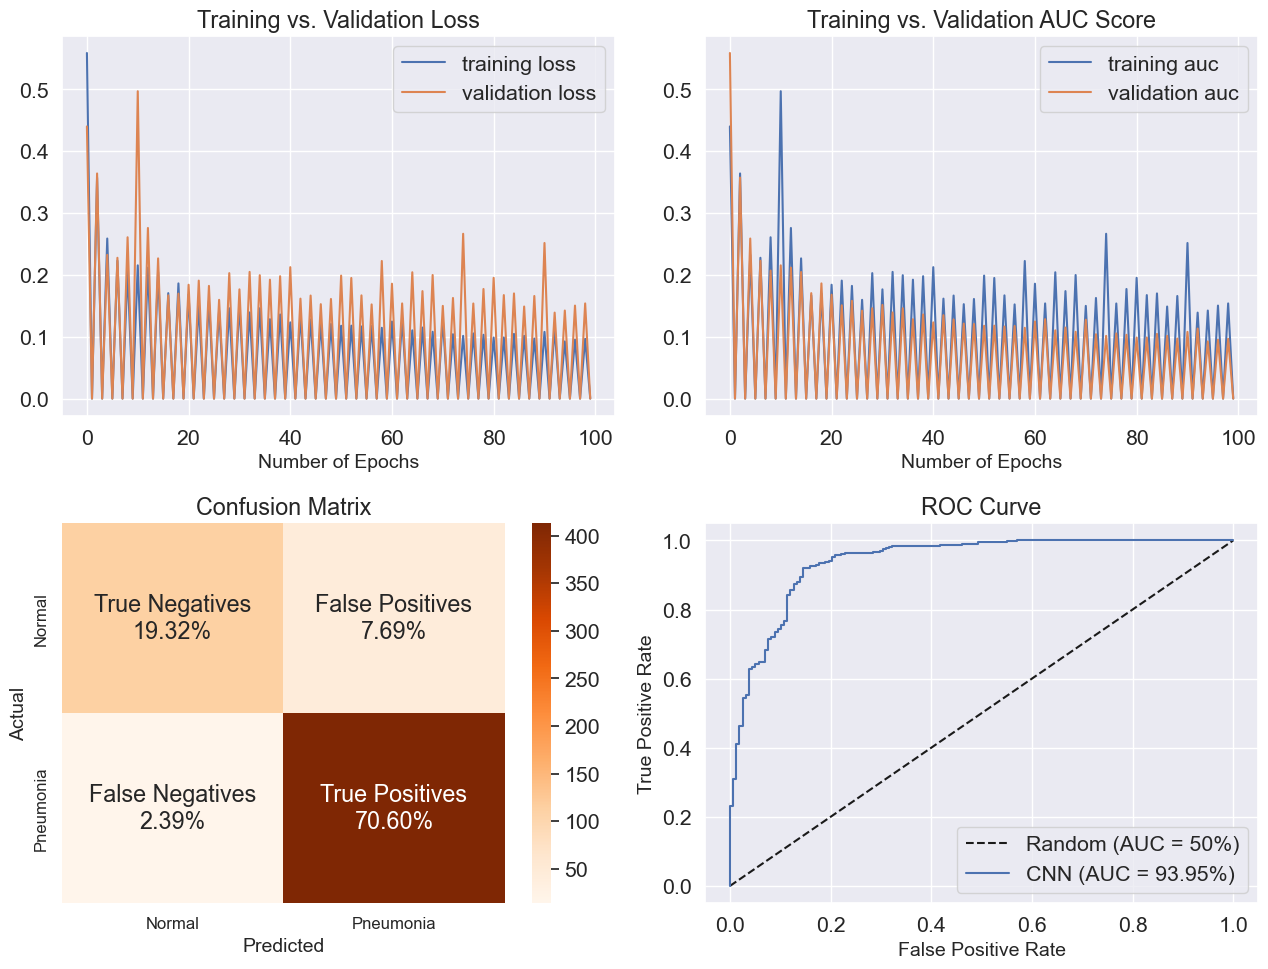

In [12]:
create_charts(cnn, cnn_model)

In [13]:
# Conv2D x 3 + 128 dense units
hyper_feature_maps = 32
cnn = Sequential()
cnn.add(InputLayer(shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=hyper_feature_maps, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=hyper_feature_maps, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=hyper_feature_maps, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 200, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/200
37/37 - 27s - 735ms/step - auc_2: 0.5104 - loss: 0.5952 - val_auc_2: 0.9231 - val_loss: 0.5624
Epoch 2/200
37/37 - 0s - 348us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/200


2024-03-30 16:41:48.766442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 16:41:48.770305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_2: 0.8258 - loss: 0.4606 - val_auc_2: 0.9467 - val_loss: 0.3229
Epoch 4/200
37/37 - 0s - 229us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/200


2024-03-30 16:42:13.858301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:42:13.861276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 683ms/step - auc_2: 0.9330 - loss: 0.2930 - val_auc_2: 0.9507 - val_loss: 0.2868
Epoch 6/200
37/37 - 0s - 206us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/200


2024-03-30 16:42:39.122840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:42:39.125583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 678ms/step - auc_2: 0.9434 - loss: 0.2704 - val_auc_2: 0.9469 - val_loss: 0.2548
Epoch 8/200
37/37 - 0s - 202us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/200


2024-03-30 16:43:04.204860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:43:04.207498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 684ms/step - auc_2: 0.9516 - loss: 0.2467 - val_auc_2: 0.9504 - val_loss: 0.2761
Epoch 10/200
37/37 - 0s - 231us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/200


2024-03-30 16:43:29.514236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:43:29.517518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_2: 0.9642 - loss: 0.2148 - val_auc_2: 0.9567 - val_loss: 0.2180
Epoch 12/200
37/37 - 0s - 203us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/200


2024-03-30 16:43:54.717543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:43:54.720144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 677ms/step - auc_2: 0.9631 - loss: 0.2177 - val_auc_2: 0.9582 - val_loss: 0.2411
Epoch 14/200
37/37 - 0s - 197us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/200


2024-03-30 16:44:19.773084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:44:19.775704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 685ms/step - auc_2: 0.9686 - loss: 0.2000 - val_auc_2: 0.9541 - val_loss: 0.2313
Epoch 16/200
37/37 - 0s - 193us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/200


2024-03-30 16:44:45.112832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:44:45.115547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 681ms/step - auc_2: 0.9675 - loss: 0.2030 - val_auc_2: 0.9451 - val_loss: 0.2544
Epoch 18/200
37/37 - 0s - 205us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/200


2024-03-30 16:45:10.337701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:45:10.340532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 719ms/step - auc_2: 0.9712 - loss: 0.1908 - val_auc_2: 0.9635 - val_loss: 0.2263
Epoch 20/200
37/37 - 0s - 253us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/200


2024-03-30 16:45:36.953952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:45:36.957610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 721ms/step - auc_2: 0.9772 - loss: 0.1709 - val_auc_2: 0.9654 - val_loss: 0.2200
Epoch 22/200
37/37 - 0s - 235us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/200


2024-03-30 16:46:03.653106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:46:03.656239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 720ms/step - auc_2: 0.9744 - loss: 0.1786 - val_auc_2: 0.9716 - val_loss: 0.1874
Epoch 24/200
37/37 - 0s - 247us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/200


2024-03-30 16:46:30.322191: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:46:30.325256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 697ms/step - auc_2: 0.9808 - loss: 0.1586 - val_auc_2: 0.9699 - val_loss: 0.2087
Epoch 26/200
37/37 - 0s - 209us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/200


2024-03-30 16:46:56.106647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:46:56.109293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 685ms/step - auc_2: 0.9796 - loss: 0.1596 - val_auc_2: 0.9726 - val_loss: 0.1911
Epoch 28/200
37/37 - 0s - 252us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/200


2024-03-30 16:47:21.473816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:47:21.476931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 683ms/step - auc_2: 0.9810 - loss: 0.1543 - val_auc_2: 0.9762 - val_loss: 0.1661
Epoch 30/200
37/37 - 0s - 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/200


2024-03-30 16:47:46.763181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:47:46.765789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 687ms/step - auc_2: 0.9823 - loss: 0.1490 - val_auc_2: 0.9795 - val_loss: 0.1604
Epoch 32/200
37/37 - 0s - 200us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/200


2024-03-30 16:48:12.177641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:48:12.180229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 685ms/step - auc_2: 0.9834 - loss: 0.1437 - val_auc_2: 0.9786 - val_loss: 0.1536
Epoch 34/200
37/37 - 0s - 215us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/200


2024-03-30 16:48:37.530192: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:48:37.533323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 688ms/step - auc_2: 0.9839 - loss: 0.1444 - val_auc_2: 0.9769 - val_loss: 0.1575
Epoch 36/200
37/37 - 0s - 203us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/200


2024-03-30 16:49:02.980752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:49:02.983423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 697ms/step - auc_2: 0.9828 - loss: 0.1430 - val_auc_2: 0.9748 - val_loss: 0.2137
Epoch 38/200
37/37 - 0s - 265us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/200


2024-03-30 16:49:28.794471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:49:28.798354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 693ms/step - auc_2: 0.9823 - loss: 0.1477 - val_auc_2: 0.9768 - val_loss: 0.1946
Epoch 40/200
37/37 - 0s - 205us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/200


2024-03-30 16:49:54.434423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:49:54.437162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 689ms/step - auc_2: 0.9852 - loss: 0.1331 - val_auc_2: 0.9804 - val_loss: 0.1463
Epoch 42/200
37/37 - 0s - 223us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/200


2024-03-30 16:50:19.939585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:50:19.942552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 687ms/step - auc_2: 0.9831 - loss: 0.1439 - val_auc_2: 0.9801 - val_loss: 0.1692
Epoch 44/200
37/37 - 0s - 191us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/200


2024-03-30 16:50:45.351344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:50:45.353850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 689ms/step - auc_2: 0.9831 - loss: 0.1433 - val_auc_2: 0.9801 - val_loss: 0.1528
Epoch 46/200
37/37 - 0s - 202us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/200


2024-03-30 16:51:10.864884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:51:10.867569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 686ms/step - auc_2: 0.9818 - loss: 0.1480 - val_auc_2: 0.9800 - val_loss: 0.1516
Epoch 48/200
37/37 - 0s - 206us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/200


2024-03-30 16:51:36.253646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:51:36.256784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 689ms/step - auc_2: 0.9872 - loss: 0.1252 - val_auc_2: 0.9786 - val_loss: 0.1495
Epoch 50/200
37/37 - 0s - 196us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/200


2024-03-30 16:52:01.772677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:52:01.775262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 693ms/step - auc_2: 0.9842 - loss: 0.1373 - val_auc_2: 0.9820 - val_loss: 0.1398
Epoch 52/200
37/37 - 0s - 208us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/200


2024-03-30 16:52:27.411495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:52:27.414540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 697ms/step - auc_2: 0.9860 - loss: 0.1331 - val_auc_2: 0.9821 - val_loss: 0.1622
Epoch 54/200
37/37 - 0s - 205us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/200


2024-03-30 16:52:53.211243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:52:53.213635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 695ms/step - auc_2: 0.9869 - loss: 0.1232 - val_auc_2: 0.9830 - val_loss: 0.1426
Epoch 56/200
37/37 - 0s - 219us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/200


2024-03-30 16:53:18.919368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:53:18.922381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 728ms/step - auc_2: 0.9851 - loss: 0.1276 - val_auc_2: 0.9773 - val_loss: 0.1728
Epoch 58/200
37/37 - 0s - 304us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/200


2024-03-30 16:53:45.853494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:53:45.856517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 785ms/step - auc_2: 0.9871 - loss: 0.1263 - val_auc_2: 0.9780 - val_loss: 0.1679
Epoch 60/200
37/37 - 0s - 280us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/200


2024-03-30 16:54:14.918704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:54:14.922939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 773ms/step - auc_2: 0.9875 - loss: 0.1239 - val_auc_2: 0.9792 - val_loss: 0.1625
Epoch 62/200
37/37 - 0s - 299us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/200


2024-03-30 16:54:43.520805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:54:43.524931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 779ms/step - auc_2: 0.9882 - loss: 0.1208 - val_auc_2: 0.9820 - val_loss: 0.1659
Epoch 64/200
37/37 - 0s - 228us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/200


2024-03-30 16:55:12.365063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:55:12.368339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 784ms/step - auc_2: 0.9886 - loss: 0.1183 - val_auc_2: 0.9810 - val_loss: 0.1464
Epoch 66/200
37/37 - 0s - 262us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/200


2024-03-30 16:55:41.374807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:55:41.378859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 780ms/step - auc_2: 0.9892 - loss: 0.1166 - val_auc_2: 0.9806 - val_loss: 0.1643
Epoch 68/200
37/37 - 0s - 225us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/200


2024-03-30 16:56:10.260627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:56:10.263554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 785ms/step - auc_2: 0.9876 - loss: 0.1209 - val_auc_2: 0.9794 - val_loss: 0.1710
Epoch 70/200
37/37 - 0s - 225us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/200


2024-03-30 16:56:39.308567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:56:39.311867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 788ms/step - auc_2: 0.9895 - loss: 0.1150 - val_auc_2: 0.9847 - val_loss: 0.1332
Epoch 72/200
37/37 - 0s - 367us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/200


2024-03-30 16:57:08.479785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:57:08.484576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 792ms/step - auc_2: 0.9868 - loss: 0.1276 - val_auc_2: 0.9743 - val_loss: 0.1954
Epoch 74/200
37/37 - 0s - 282us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/200


2024-03-30 16:57:37.798297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:57:37.803145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 794ms/step - auc_2: 0.9887 - loss: 0.1183 - val_auc_2: 0.9794 - val_loss: 0.1633
Epoch 76/200
37/37 - 0s - 251us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/200


2024-03-30 16:58:07.193254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:58:07.196653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 798ms/step - auc_2: 0.9863 - loss: 0.1291 - val_auc_2: 0.9727 - val_loss: 0.2225
Epoch 78/200
37/37 - 0s - 303us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/200


2024-03-30 16:58:36.742102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:58:36.746683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 800ms/step - auc_2: 0.9874 - loss: 0.1207 - val_auc_2: 0.9766 - val_loss: 0.1730
Epoch 80/200
37/37 - 0s - 225us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/200


2024-03-30 16:59:06.367031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:59:06.369642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 787ms/step - auc_2: 0.9903 - loss: 0.1071 - val_auc_2: 0.9843 - val_loss: 0.1438
Epoch 82/200
37/37 - 0s - 274us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/200


2024-03-30 16:59:35.493543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 16:59:35.497169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 774ms/step - auc_2: 0.9887 - loss: 0.1178 - val_auc_2: 0.9868 - val_loss: 0.1509
Epoch 84/200
37/37 - 0s - 227us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/200


2024-03-30 17:00:04.149679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:00:04.152950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 737ms/step - auc_2: 0.9896 - loss: 0.1145 - val_auc_2: 0.9854 - val_loss: 0.1296
Epoch 86/200
37/37 - 0s - 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/200


2024-03-30 17:00:31.412252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:00:31.415026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 715ms/step - auc_2: 0.9903 - loss: 0.1084 - val_auc_2: 0.9839 - val_loss: 0.1763
Epoch 88/200
37/37 - 0s - 210us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/200


2024-03-30 17:00:57.867295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:00:57.870029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 709ms/step - auc_2: 0.9872 - loss: 0.1223 - val_auc_2: 0.9826 - val_loss: 0.1599
Epoch 90/200
37/37 - 0s - 194us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/200


2024-03-30 17:01:24.110331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:01:24.112755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 707ms/step - auc_2: 0.9903 - loss: 0.1083 - val_auc_2: 0.9842 - val_loss: 0.1664
Epoch 92/200
37/37 - 0s - 210us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/200


2024-03-30 17:01:50.284399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:01:50.287202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 713ms/step - auc_2: 0.9880 - loss: 0.1182 - val_auc_2: 0.9814 - val_loss: 0.1421
Epoch 94/200
37/37 - 0s - 193us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/200


2024-03-30 17:02:16.686265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:02:16.688804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 715ms/step - auc_2: 0.9896 - loss: 0.1148 - val_auc_2: 0.9727 - val_loss: 0.1695
Epoch 96/200
37/37 - 0s - 213us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/200


2024-03-30 17:02:43.137880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:02:43.140605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 713ms/step - auc_2: 0.9877 - loss: 0.1230 - val_auc_2: 0.9846 - val_loss: 0.1491
Epoch 98/200
37/37 - 0s - 200us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/200


2024-03-30 17:03:09.524766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:03:09.527308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 705ms/step - auc_2: 0.9901 - loss: 0.1076 - val_auc_2: 0.9825 - val_loss: 0.1659
Epoch 100/200
37/37 - 0s - 217us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 101/200


2024-03-30 17:03:35.613991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:03:35.616691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 703ms/step - auc_2: 0.9921 - loss: 0.0963 - val_auc_2: 0.9832 - val_loss: 0.1541
Epoch 102/200
37/37 - 0s - 213us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 103/200


2024-03-30 17:04:01.643800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:04:01.646851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 706ms/step - auc_2: 0.9906 - loss: 0.1065 - val_auc_2: 0.9848 - val_loss: 0.1494
Epoch 104/200
37/37 - 0s - 200us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 105/200


2024-03-30 17:04:27.770007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:04:27.772693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 718ms/step - auc_2: 0.9908 - loss: 0.1002 - val_auc_2: 0.9884 - val_loss: 0.1194
Epoch 106/200
37/37 - 0s - 196us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 107/200


2024-03-30 17:04:54.329855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:04:54.332318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 716ms/step - auc_2: 0.9910 - loss: 0.0985 - val_auc_2: 0.9811 - val_loss: 0.1784
Epoch 108/200
37/37 - 0s - 218us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 109/200


2024-03-30 17:05:20.828255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:05:20.831040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 711ms/step - auc_2: 0.9909 - loss: 0.1038 - val_auc_2: 0.9748 - val_loss: 0.2170
Epoch 110/200
37/37 - 0s - 212us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 111/200


2024-03-30 17:05:47.134477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:05:47.137675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 723ms/step - auc_2: 0.9924 - loss: 0.0975 - val_auc_2: 0.9814 - val_loss: 0.1659
Epoch 112/200
37/37 - 0s - 227us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 113/200


2024-03-30 17:06:13.906450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:06:13.909721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 723ms/step - auc_2: 0.9900 - loss: 0.1093 - val_auc_2: 0.9830 - val_loss: 0.1605
Epoch 114/200
37/37 - 0s - 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 115/200


2024-03-30 17:06:40.676580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:06:40.679153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 718ms/step - auc_2: 0.9910 - loss: 0.1023 - val_auc_2: 0.9824 - val_loss: 0.1881
Epoch 116/200
37/37 - 0s - 259us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 117/200


2024-03-30 17:07:07.264531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:07.268510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 728ms/step - auc_2: 0.9920 - loss: 0.0966 - val_auc_2: 0.9856 - val_loss: 0.1317
Epoch 118/200
37/37 - 0s - 216us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 119/200


2024-03-30 17:07:34.208100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:34.210631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 722ms/step - auc_2: 0.9924 - loss: 0.0957 - val_auc_2: 0.9813 - val_loss: 0.1762
Epoch 120/200
37/37 - 0s - 207us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 121/200


2024-03-30 17:08:00.937591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:00.940075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 714ms/step - auc_2: 0.9903 - loss: 0.1063 - val_auc_2: 0.9850 - val_loss: 0.1360
Epoch 122/200
37/37 - 0s - 238us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 123/200


2024-03-30 17:08:27.354177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:27.357370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 714ms/step - auc_2: 0.9908 - loss: 0.0993 - val_auc_2: 0.9833 - val_loss: 0.1889
Epoch 124/200
37/37 - 0s - 220us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 125/200


2024-03-30 17:08:53.770068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:53.773129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 739ms/step - auc_2: 0.9924 - loss: 0.0984 - val_auc_2: 0.9840 - val_loss: 0.1641
Epoch 126/200
37/37 - 0s - 204us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 127/200


2024-03-30 17:09:21.132175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:09:21.134779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 714ms/step - auc_2: 0.9909 - loss: 0.0973 - val_auc_2: 0.9805 - val_loss: 0.1576
Epoch 128/200
37/37 - 0s - 299us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 129/200


2024-03-30 17:09:47.543859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:09:47.546947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 736ms/step - auc_2: 0.9930 - loss: 0.0906 - val_auc_2: 0.9825 - val_loss: 0.1445
Epoch 130/200
37/37 - 0s - 275us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 131/200


2024-03-30 17:10:14.796479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:10:14.800066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 701ms/step - auc_2: 0.9925 - loss: 0.0905 - val_auc_2: 0.9842 - val_loss: 0.1361
Epoch 132/200
37/37 - 0s - 201us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 133/200


2024-03-30 17:10:40.734814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:10:40.737389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 709ms/step - auc_2: 0.9923 - loss: 0.0974 - val_auc_2: 0.9846 - val_loss: 0.1554
Epoch 134/200
37/37 - 0s - 241us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 135/200


2024-03-30 17:11:06.988871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:11:06.992127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 699ms/step - auc_2: 0.9926 - loss: 0.0910 - val_auc_2: 0.9854 - val_loss: 0.1581
Epoch 136/200
37/37 - 0s - 199us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 137/200


2024-03-30 17:11:32.854443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:11:32.857218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 720ms/step - auc_2: 0.9927 - loss: 0.0958 - val_auc_2: 0.9839 - val_loss: 0.1615
Epoch 138/200
37/37 - 0s - 245us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 139/200


2024-03-30 17:11:59.519279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:11:59.522589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 704ms/step - auc_2: 0.9927 - loss: 0.0920 - val_auc_2: 0.9733 - val_loss: 0.2303
Epoch 140/200
37/37 - 0s - 244us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 141/200


2024-03-30 17:12:25.574559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:12:25.577262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 714ms/step - auc_2: 0.9935 - loss: 0.0875 - val_auc_2: 0.9894 - val_loss: 0.1269
Epoch 142/200
37/37 - 0s - 223us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 143/200


2024-03-30 17:12:51.996895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:12:52.000094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 725ms/step - auc_2: 0.9927 - loss: 0.0953 - val_auc_2: 0.9796 - val_loss: 0.1698
Epoch 144/200
37/37 - 0s - 277us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 145/200


2024-03-30 17:13:18.816231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:13:18.820244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 705ms/step - auc_2: 0.9927 - loss: 0.0896 - val_auc_2: 0.9828 - val_loss: 0.1914
Epoch 146/200
37/37 - 0s - 211us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 147/200


2024-03-30 17:13:44.901146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:13:44.903842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 698ms/step - auc_2: 0.9936 - loss: 0.0876 - val_auc_2: 0.9832 - val_loss: 0.1948
Epoch 148/200
37/37 - 0s - 275us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 149/200


2024-03-30 17:14:10.730466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:14:10.734213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 700ms/step - auc_2: 0.9937 - loss: 0.0886 - val_auc_2: 0.9891 - val_loss: 0.1355
Epoch 150/200
37/37 - 0s - 197us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 151/200


2024-03-30 17:14:36.641907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:14:36.644587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 697ms/step - auc_2: 0.9930 - loss: 0.0917 - val_auc_2: 0.9880 - val_loss: 0.1504
Epoch 152/200
37/37 - 0s - 198us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 153/200


2024-03-30 17:15:02.456318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:15:02.458889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 700ms/step - auc_2: 0.9929 - loss: 0.0919 - val_auc_2: 0.9838 - val_loss: 0.1376
Epoch 154/200
37/37 - 0s - 252us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 155/200


2024-03-30 17:15:28.360936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:15:28.364566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 694ms/step - auc_2: 0.9935 - loss: 0.0867 - val_auc_2: 0.9856 - val_loss: 0.1537
Epoch 156/200
37/37 - 0s - 243us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 157/200


2024-03-30 17:15:54.064430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:15:54.067905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 724ms/step - auc_2: 0.9931 - loss: 0.0875 - val_auc_2: 0.9871 - val_loss: 0.1352
Epoch 158/200
37/37 - 0s - 212us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 159/200


2024-03-30 17:16:20.857203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:16:20.859963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 721ms/step - auc_2: 0.9938 - loss: 0.0802 - val_auc_2: 0.9844 - val_loss: 0.1589
Epoch 160/200
37/37 - 0s - 251us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 161/200


2024-03-30 17:16:47.563701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:16:47.567129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 708ms/step - auc_2: 0.9943 - loss: 0.0797 - val_auc_2: 0.9779 - val_loss: 0.1824
Epoch 162/200
37/37 - 0s - 196us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 163/200


2024-03-30 17:17:13.770516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:17:13.773001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 690ms/step - auc_2: 0.9942 - loss: 0.0788 - val_auc_2: 0.9840 - val_loss: 0.1512
Epoch 164/200
37/37 - 0s - 235us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 165/200


2024-03-30 17:17:39.295432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:17:39.298635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 697ms/step - auc_2: 0.9931 - loss: 0.0882 - val_auc_2: 0.9894 - val_loss: 0.1459
Epoch 166/200
37/37 - 0s - 209us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 167/200


2024-03-30 17:18:05.084744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:18:05.087581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 684ms/step - auc_2: 0.9927 - loss: 0.0862 - val_auc_2: 0.9803 - val_loss: 0.1825
Epoch 168/200
37/37 - 0s - 202us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 169/200


2024-03-30 17:18:30.418108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:18:30.420641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 693ms/step - auc_2: 0.9942 - loss: 0.0807 - val_auc_2: 0.9890 - val_loss: 0.1151
Epoch 170/200
37/37 - 0s - 209us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 171/200


2024-03-30 17:18:56.055477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:18:56.058049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 25s - 689ms/step - auc_2: 0.9926 - loss: 0.0927 - val_auc_2: 0.9752 - val_loss: 0.2396
Epoch 172/200
37/37 - 0s - 205us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 173/200


2024-03-30 17:19:21.542483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:19:21.545121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 739ms/step - auc_2: 0.9934 - loss: 0.0890 - val_auc_2: 0.9849 - val_loss: 0.1703
Epoch 174/200
37/37 - 0s - 211us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 175/200


2024-03-30 17:19:48.886860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:19:48.889705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 779ms/step - auc_2: 0.9944 - loss: 0.0811 - val_auc_2: 0.9857 - val_loss: 0.1322
Epoch 176/200
37/37 - 0s - 364us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 177/200


2024-03-30 17:20:17.723826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:20:17.729851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 796ms/step - auc_2: 0.9945 - loss: 0.0823 - val_auc_2: 0.9760 - val_loss: 0.2683
Epoch 178/200
37/37 - 0s - 350us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 179/200


2024-03-30 17:20:47.201002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:20:47.204804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 782ms/step - auc_2: 0.9938 - loss: 0.0836 - val_auc_2: 0.9894 - val_loss: 0.1471
Epoch 180/200
37/37 - 0s - 330us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 181/200


2024-03-30 17:21:16.147546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:21:16.151501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 757ms/step - auc_2: 0.9947 - loss: 0.0806 - val_auc_2: 0.9841 - val_loss: 0.1935
Epoch 182/200
37/37 - 0s - 246us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 183/200


2024-03-30 17:21:44.183744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:21:44.187074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 752ms/step - auc_2: 0.9949 - loss: 0.0748 - val_auc_2: 0.9868 - val_loss: 0.1588
Epoch 184/200
37/37 - 0s - 286us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 185/200


2024-03-30 17:22:12.015407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:22:12.019751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 772ms/step - auc_2: 0.9950 - loss: 0.0773 - val_auc_2: 0.9888 - val_loss: 0.1360
Epoch 186/200
37/37 - 0s - 290us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 187/200


2024-03-30 17:22:40.587686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:22:40.592225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 769ms/step - auc_2: 0.9940 - loss: 0.0839 - val_auc_2: 0.9888 - val_loss: 0.1254
Epoch 188/200
37/37 - 0s - 230us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 189/200


2024-03-30 17:23:09.071460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:23:09.074527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 716ms/step - auc_2: 0.9955 - loss: 0.0746 - val_auc_2: 0.9897 - val_loss: 0.1165
Epoch 190/200
37/37 - 0s - 236us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 191/200


2024-03-30 17:23:35.577970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:23:35.580777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 784ms/step - auc_2: 0.9952 - loss: 0.0736 - val_auc_2: 0.9842 - val_loss: 0.1396
Epoch 192/200
37/37 - 0s - 266us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 193/200


2024-03-30 17:24:04.601346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:24:04.605003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 715ms/step - auc_2: 0.9943 - loss: 0.0756 - val_auc_2: 0.9854 - val_loss: 0.1447
Epoch 194/200
37/37 - 0s - 199us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 195/200


2024-03-30 17:24:31.071406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:24:31.074147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 694ms/step - auc_2: 0.9955 - loss: 0.0721 - val_auc_2: 0.9792 - val_loss: 0.1612
Epoch 196/200
37/37 - 0s - 210us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 197/200


2024-03-30 17:24:56.766310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:24:56.768863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 701ms/step - auc_2: 0.9951 - loss: 0.0754 - val_auc_2: 0.9892 - val_loss: 0.1426
Epoch 198/200
37/37 - 0s - 216us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 199/200


2024-03-30 17:25:22.721816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:25:22.724523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 730ms/step - auc_2: 0.9946 - loss: 0.0769 - val_auc_2: 0.9866 - val_loss: 0.1781
Epoch 200/200
37/37 - 0s - 205us/step - auc_2: 0.0000e+00 - loss: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 17:25:49.747255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:25:49.750002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x284dd5bc0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step
[Summary Statistics]
Accuracy = 91.11% | Precision = 89.47% | Recall = 99.53% | Specificity = 68.35% | F1 Score = 94.24%


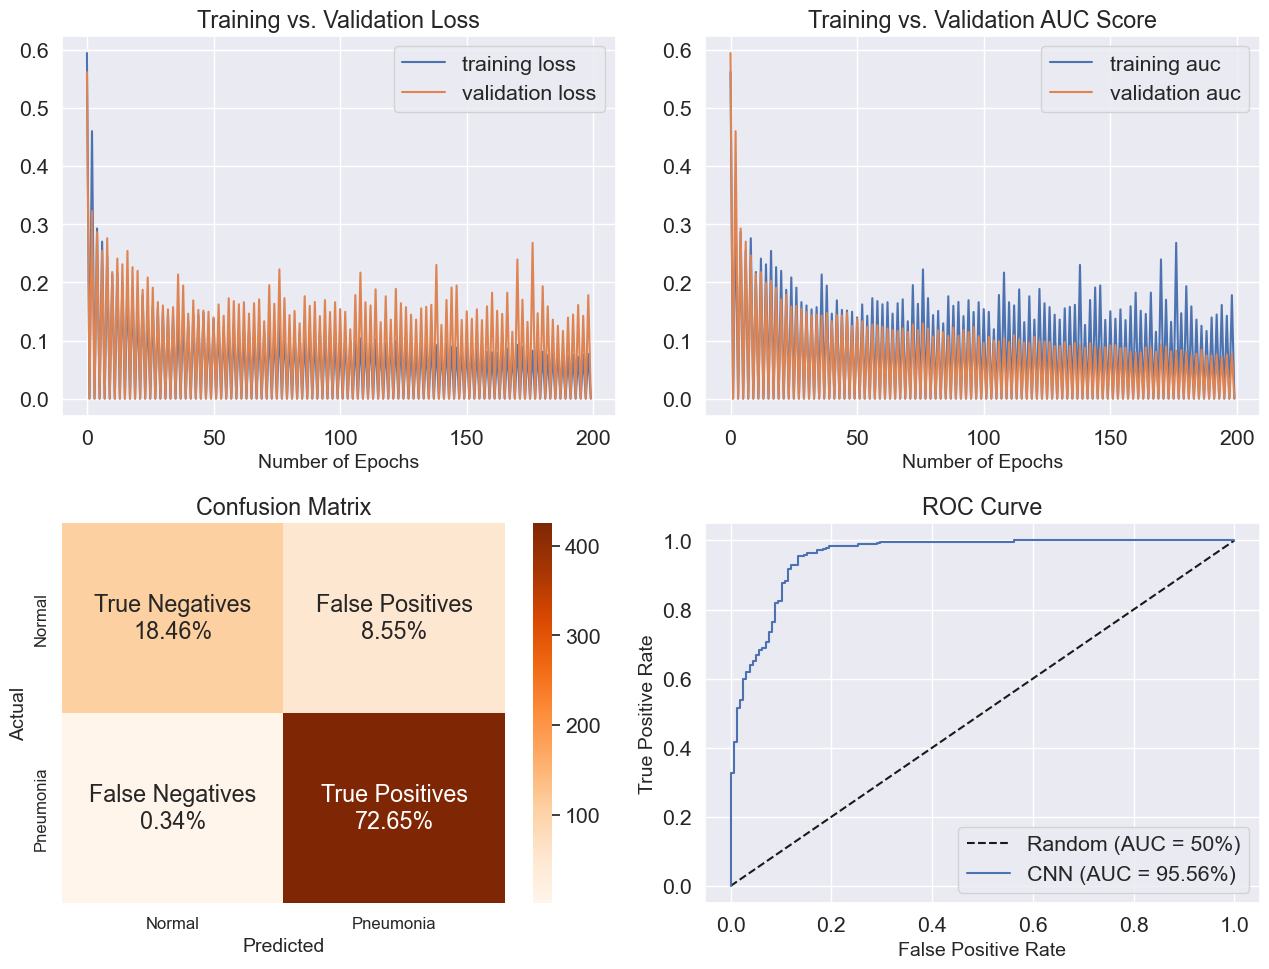

In [14]:
create_charts(cnn, cnn_model)

In [15]:
## batch size: 64 Conv2D (filter: 32, 64, 128)  x 3 + different dense units + Batch Normalization
cnn = Sequential()
cnn.add(InputLayer(shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64, kernel_size=3))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=128, kernel_size=3))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(BatchNormalization())
cnn.add(Dense(activation='relu', units=1024))
cnn.add(Dense(activation='relu', units=512))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 100, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/100
37/37 - 28s - 760ms/step - auc_3: 0.9542 - loss: 0.2552 - val_auc_3: 0.9484 - val_loss: 0.5727
Epoch 2/100
37/37 - 0s - 379us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


2024-03-30 17:30:53.116891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 17:30:53.121162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 706ms/step - auc_3: 0.9797 - loss: 0.1593 - val_auc_3: 0.9468 - val_loss: 0.5501
Epoch 4/100
37/37 - 0s - 245us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100


2024-03-30 17:31:19.262761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:31:19.266053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 707ms/step - auc_3: 0.9851 - loss: 0.1299 - val_auc_3: 0.9678 - val_loss: 0.4717
Epoch 6/100
37/37 - 0s - 260us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100


2024-03-30 17:31:45.439556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:31:45.442303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 706ms/step - auc_3: 0.9828 - loss: 0.1472 - val_auc_3: 0.9709 - val_loss: 0.5060
Epoch 8/100
37/37 - 0s - 232us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100


2024-03-30 17:32:11.574793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:32:11.577571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 713ms/step - auc_3: 0.9879 - loss: 0.1175 - val_auc_3: 0.9882 - val_loss: 0.4441
Epoch 10/100
37/37 - 0s - 233us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100


2024-03-30 17:32:37.950987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:32:37.953964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 768ms/step - auc_3: 0.9885 - loss: 0.1193 - val_auc_3: 0.9820 - val_loss: 0.4308
Epoch 12/100
37/37 - 0s - 293us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/100


2024-03-30 17:33:06.386386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:33:06.389729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 772ms/step - auc_3: 0.9912 - loss: 0.1033 - val_auc_3: 0.9672 - val_loss: 0.4290
Epoch 14/100
37/37 - 0s - 274us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/100


2024-03-30 17:33:34.973118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:33:34.976553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 760ms/step - auc_3: 0.9949 - loss: 0.0777 - val_auc_3: 0.9113 - val_loss: 0.4108
Epoch 16/100
37/37 - 0s - 270us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/100


2024-03-30 17:34:03.106486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:34:03.109937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 754ms/step - auc_3: 0.9942 - loss: 0.0839 - val_auc_3: 0.9730 - val_loss: 0.3001
Epoch 18/100
37/37 - 0s - 290us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/100


2024-03-30 17:34:31.014356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:34:31.018309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 764ms/step - auc_3: 0.9937 - loss: 0.0853 - val_auc_3: 0.9682 - val_loss: 0.4792
Epoch 20/100
37/37 - 0s - 267us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/100


2024-03-30 17:34:59.290632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:34:59.294456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 766ms/step - auc_3: 0.9942 - loss: 0.0775 - val_auc_3: 0.9298 - val_loss: 0.3500
Epoch 22/100
37/37 - 0s - 258us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100


2024-03-30 17:35:27.648828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:35:27.652322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 777ms/step - auc_3: 0.9958 - loss: 0.0744 - val_auc_3: 0.9852 - val_loss: 0.2613
Epoch 24/100
37/37 - 0s - 239us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/100


2024-03-30 17:35:56.412765: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:35:56.415816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 772ms/step - auc_3: 0.9954 - loss: 0.0688 - val_auc_3: 0.9664 - val_loss: 0.2531
Epoch 26/100
37/37 - 0s - 221us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/100


2024-03-30 17:36:25.000863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:36:25.003928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 781ms/step - auc_3: 0.9964 - loss: 0.0657 - val_auc_3: 0.9720 - val_loss: 0.1965
Epoch 28/100
37/37 - 0s - 248us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/100


2024-03-30 17:36:53.900508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:36:53.903495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 785ms/step - auc_3: 0.9955 - loss: 0.0668 - val_auc_3: 0.9614 - val_loss: 0.4242
Epoch 30/100
37/37 - 0s - 217us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/100


2024-03-30 17:37:22.942965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:37:22.945753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 773ms/step - auc_3: 0.9970 - loss: 0.0579 - val_auc_3: 0.9104 - val_loss: 1.9056
Epoch 32/100
37/37 - 0s - 219us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/100


2024-03-30 17:37:51.540245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:37:51.542963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 777ms/step - auc_3: 0.9969 - loss: 0.0593 - val_auc_3: 0.9853 - val_loss: 0.2035
Epoch 34/100
37/37 - 0s - 233us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/100


2024-03-30 17:38:20.297715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:38:20.300815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 756ms/step - auc_3: 0.9965 - loss: 0.0475 - val_auc_3: 0.9761 - val_loss: 0.1567
Epoch 36/100
37/37 - 0s - 207us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/100


2024-03-30 17:38:48.270170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:38:48.272684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 804ms/step - auc_3: 0.9968 - loss: 0.0544 - val_auc_3: 0.9109 - val_loss: 0.8192
Epoch 38/100
37/37 - 0s - 532us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/100


2024-03-30 17:39:18.031432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:39:18.036153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 31s - 835ms/step - auc_3: 0.9968 - loss: 0.0596 - val_auc_3: 0.9460 - val_loss: 0.4484
Epoch 40/100
37/37 - 0s - 239us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/100


2024-03-30 17:39:48.935210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:39:48.938218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 781ms/step - auc_3: 0.9983 - loss: 0.0396 - val_auc_3: 0.9377 - val_loss: 0.3976
Epoch 42/100
37/37 - 0s - 213us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/100


2024-03-30 17:40:17.842739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:40:17.845335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 778ms/step - auc_3: 0.9974 - loss: 0.0469 - val_auc_3: 0.9749 - val_loss: 0.1983
Epoch 44/100
37/37 - 0s - 251us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/100


2024-03-30 17:40:46.654971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:40:46.658338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 783ms/step - auc_3: 0.9971 - loss: 0.0529 - val_auc_3: 0.8677 - val_loss: 0.6516
Epoch 46/100
37/37 - 0s - 204us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/100


2024-03-30 17:41:15.620663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:41:15.623289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 780ms/step - auc_3: 0.9984 - loss: 0.0393 - val_auc_3: 0.9177 - val_loss: 0.4634
Epoch 48/100
37/37 - 0s - 228us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/100


2024-03-30 17:41:44.473046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:41:44.475838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 769ms/step - auc_3: 0.9976 - loss: 0.0477 - val_auc_3: 0.9625 - val_loss: 0.3060
Epoch 50/100
37/37 - 0s - 215us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/100


2024-03-30 17:42:12.939278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:42:12.941759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 759ms/step - auc_3: 0.9980 - loss: 0.0374 - val_auc_3: 0.9058 - val_loss: 0.5778
Epoch 52/100
37/37 - 0s - 210us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100


2024-03-30 17:42:41.024466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:42:41.026958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 797ms/step - auc_3: 0.9990 - loss: 0.0353 - val_auc_3: 0.9615 - val_loss: 0.2052
Epoch 54/100
37/37 - 0s - 299us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100


2024-03-30 17:43:10.507978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:43:10.512438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 780ms/step - auc_3: 0.9988 - loss: 0.0325 - val_auc_3: 0.8259 - val_loss: 1.2542
Epoch 56/100
37/37 - 0s - 230us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100


2024-03-30 17:43:39.386470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:43:39.389648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 775ms/step - auc_3: 0.9986 - loss: 0.0342 - val_auc_3: 0.9774 - val_loss: 0.1873
Epoch 58/100
37/37 - 0s - 228us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/100


2024-03-30 17:44:08.064138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:44:08.066830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 782ms/step - auc_3: 0.9972 - loss: 0.0427 - val_auc_3: 0.8786 - val_loss: 0.7383
Epoch 60/100
37/37 - 0s - 274us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/100


2024-03-30 17:44:37.003596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:44:37.007054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 790ms/step - auc_3: 0.9978 - loss: 0.0420 - val_auc_3: 0.9680 - val_loss: 0.2039
Epoch 62/100
37/37 - 0s - 257us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/100


2024-03-30 17:45:06.232280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:45:06.234904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 780ms/step - auc_3: 0.9980 - loss: 0.0389 - val_auc_3: 0.9764 - val_loss: 0.1442
Epoch 64/100
37/37 - 0s - 279us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/100


2024-03-30 17:45:35.114075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:45:35.117617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 759ms/step - auc_3: 0.9989 - loss: 0.0340 - val_auc_3: 0.9116 - val_loss: 0.5295
Epoch 66/100
37/37 - 0s - 204us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/100


2024-03-30 17:46:03.198108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:46:03.200875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 795ms/step - auc_3: 0.9985 - loss: 0.0340 - val_auc_3: 0.9377 - val_loss: 0.3163
Epoch 68/100
37/37 - 0s - 271us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/100


2024-03-30 17:46:32.632579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:46:32.636236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 775ms/step - auc_3: 0.9987 - loss: 0.0365 - val_auc_3: 0.9630 - val_loss: 0.3570
Epoch 70/100
37/37 - 0s - 201us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/100


2024-03-30 17:47:01.331280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:47:01.333896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 771ms/step - auc_3: 0.9990 - loss: 0.0287 - val_auc_3: 0.9266 - val_loss: 0.5162
Epoch 72/100
37/37 - 0s - 232us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/100


2024-03-30 17:47:29.864843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:47:29.867684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 791ms/step - auc_3: 0.9989 - loss: 0.0322 - val_auc_3: 0.8298 - val_loss: 1.0757
Epoch 74/100
37/37 - 0s - 212us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/100


2024-03-30 17:47:59.155577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:47:59.158190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 751ms/step - auc_3: 0.9990 - loss: 0.0335 - val_auc_3: 0.9697 - val_loss: 0.2017
Epoch 76/100
37/37 - 0s - 228us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100


2024-03-30 17:48:26.941819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:48:26.945078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 782ms/step - auc_3: 0.9989 - loss: 0.0324 - val_auc_3: 0.9014 - val_loss: 0.7727
Epoch 78/100
37/37 - 0s - 219us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100


2024-03-30 17:48:55.883878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:48:55.886703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 789ms/step - auc_3: 0.9991 - loss: 0.0220 - val_auc_3: 0.8870 - val_loss: 0.6899
Epoch 80/100
37/37 - 0s - 292us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100


2024-03-30 17:49:25.098882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:49:25.103174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 762ms/step - auc_3: 0.9993 - loss: 0.0243 - val_auc_3: 0.8826 - val_loss: 0.6961
Epoch 82/100
37/37 - 0s - 237us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100


2024-03-30 17:49:53.295695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:49:53.298822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 803ms/step - auc_3: 0.9988 - loss: 0.0233 - val_auc_3: 0.9375 - val_loss: 0.4325
Epoch 84/100
37/37 - 0s - 246us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100


2024-03-30 17:50:23.022710: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:50:23.025899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 774ms/step - auc_3: 0.9980 - loss: 0.0329 - val_auc_3: 0.6962 - val_loss: 2.3032
Epoch 86/100
37/37 - 0s - 218us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/100


2024-03-30 17:50:51.671868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:50:51.674772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 766ms/step - auc_3: 0.9984 - loss: 0.0362 - val_auc_3: 0.9304 - val_loss: 0.3357
Epoch 88/100
37/37 - 0s - 250us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/100


2024-03-30 17:51:20.042565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:51:20.045667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 789ms/step - auc_3: 0.9992 - loss: 0.0269 - val_auc_3: 0.9828 - val_loss: 0.1437
Epoch 90/100
37/37 - 0s - 234us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/100


2024-03-30 17:51:49.245448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:51:49.248255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 775ms/step - auc_3: 0.9996 - loss: 0.0185 - val_auc_3: 0.8449 - val_loss: 1.3008
Epoch 92/100
37/37 - 0s - 224us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/100


2024-03-30 17:52:17.937606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:52:17.940619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 796ms/step - auc_3: 0.9971 - loss: 0.0372 - val_auc_3: 0.9596 - val_loss: 0.2844
Epoch 94/100
37/37 - 0s - 493us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/100


2024-03-30 17:52:47.405967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:52:47.414236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 787ms/step - auc_3: 0.9991 - loss: 0.0260 - val_auc_3: 0.9131 - val_loss: 0.5959
Epoch 96/100
37/37 - 0s - 268us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/100


2024-03-30 17:53:16.545911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:53:16.549423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 822ms/step - auc_3: 0.9994 - loss: 0.0149 - val_auc_3: 0.9162 - val_loss: 0.5798
Epoch 98/100
37/37 - 0s - 270us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/100


2024-03-30 17:53:46.967345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:53:46.970922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 788ms/step - auc_3: 0.9986 - loss: 0.0263 - val_auc_3: 0.8920 - val_loss: 1.9773
Epoch 100/100
37/37 - 0s - 204us/step - auc_3: 0.0000e+00 - loss: 0.0000e+00 - val_auc_3: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 17:54:16.122719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:54:16.125315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step
[Summary Statistics]
Accuracy = 68.03% | Precision = 98.78% | Recall = 56.91% | Specificity = 98.10% | F1 Score = 72.21%


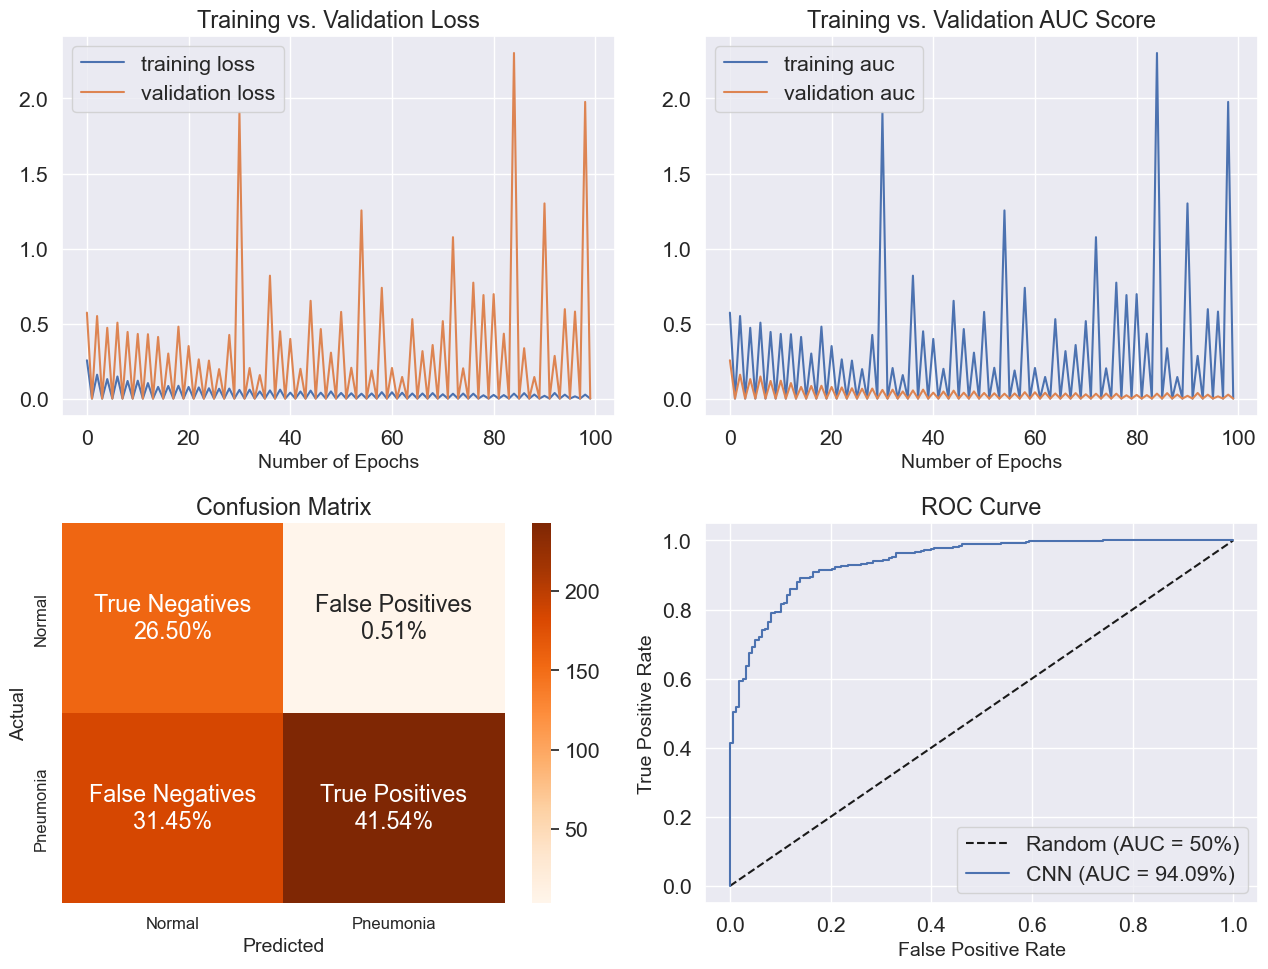

In [16]:
create_charts(cnn, cnn_model)

In [17]:
## Conv2D (filter: 32, 64, 128)  x 3 + different dense units + Batch Normalization + Dropout Dense layer
cnn = Sequential()
cnn.add(InputLayer(shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='elu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='elu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(filters=128, kernel_size=3, activation='elu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.3))

cnn.add(Flatten())

cnn.add(BatchNormalization())
cnn.add(Dense(activation='relu', units=512))
cnn.add(Dropout(0.25))
cnn.add(Dense(activation='relu', units=256))
cnn.add(Dropout(0.25))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 100, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/100
37/37 - 29s - 788ms/step - auc_4: 0.8724 - loss: 0.3932 - val_auc_4: 0.9720 - val_loss: 0.5993
Epoch 2/100
37/37 - 0s - 417us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


2024-03-30 18:00:48.392559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 18:00:48.397141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 722ms/step - auc_4: 0.9559 - loss: 0.2360 - val_auc_4: 0.9748 - val_loss: 0.5019
Epoch 4/100
37/37 - 0s - 252us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100


2024-03-30 18:01:15.120744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:01:15.123874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 26s - 712ms/step - auc_4: 0.9654 - loss: 0.2103 - val_auc_4: 0.9770 - val_loss: 0.4723
Epoch 6/100
37/37 - 0s - 214us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100


2024-03-30 18:01:41.487594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:01:41.490176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 717ms/step - auc_4: 0.9704 - loss: 0.1963 - val_auc_4: 0.9707 - val_loss: 0.4403
Epoch 8/100
37/37 - 0s - 204us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100


2024-03-30 18:02:08.018700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:02:08.021506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 723ms/step - auc_4: 0.9700 - loss: 0.1955 - val_auc_4: 0.9773 - val_loss: 0.4190
Epoch 10/100
37/37 - 0s - 203us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100


2024-03-30 18:02:34.774778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:02:34.777519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 724ms/step - auc_4: 0.9769 - loss: 0.1709 - val_auc_4: 0.9761 - val_loss: 0.3642
Epoch 12/100
37/37 - 0s - 209us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/100


2024-03-30 18:03:01.579629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:03:01.582105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 737ms/step - auc_4: 0.9810 - loss: 0.1555 - val_auc_4: 0.9796 - val_loss: 0.3165
Epoch 14/100
37/37 - 0s - 198us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/100


2024-03-30 18:03:28.857354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:03:28.860002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 771ms/step - auc_4: 0.9773 - loss: 0.1672 - val_auc_4: 0.9795 - val_loss: 0.3409
Epoch 16/100
37/37 - 0s - 206us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/100


2024-03-30 18:03:57.377230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:03:57.379927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 744ms/step - auc_4: 0.9795 - loss: 0.1609 - val_auc_4: 0.9797 - val_loss: 0.2801
Epoch 18/100
37/37 - 0s - 195us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/100


2024-03-30 18:04:24.912653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:04:24.915232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 748ms/step - auc_4: 0.9800 - loss: 0.1563 - val_auc_4: 0.9814 - val_loss: 0.3211
Epoch 20/100
37/37 - 0s - 201us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/100


2024-03-30 18:04:52.599724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:04:52.602257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 745ms/step - auc_4: 0.9811 - loss: 0.1525 - val_auc_4: 0.9784 - val_loss: 0.2966
Epoch 22/100
37/37 - 0s - 212us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100


2024-03-30 18:05:20.174280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:05:20.176871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 749ms/step - auc_4: 0.9825 - loss: 0.1492 - val_auc_4: 0.9792 - val_loss: 0.2522
Epoch 24/100
37/37 - 0s - 224us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/100


2024-03-30 18:05:47.884768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:05:47.887788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 742ms/step - auc_4: 0.9833 - loss: 0.1426 - val_auc_4: 0.9824 - val_loss: 0.2559
Epoch 26/100
37/37 - 0s - 199us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/100


2024-03-30 18:06:15.340710: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:06:15.343332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 748ms/step - auc_4: 0.9855 - loss: 0.1318 - val_auc_4: 0.9886 - val_loss: 0.1959
Epoch 28/100
37/37 - 0s - 195us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/100


2024-03-30 18:06:43.034546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:06:43.037032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 751ms/step - auc_4: 0.9835 - loss: 0.1437 - val_auc_4: 0.9762 - val_loss: 0.2245
Epoch 30/100
37/37 - 0s - 200us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/100


2024-03-30 18:07:10.830958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:07:10.833521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 749ms/step - auc_4: 0.9848 - loss: 0.1380 - val_auc_4: 0.9874 - val_loss: 0.1543
Epoch 32/100
37/37 - 0s - 199us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/100


2024-03-30 18:07:38.556518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:07:38.559136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 792ms/step - auc_4: 0.9864 - loss: 0.1257 - val_auc_4: 0.9757 - val_loss: 0.2177
Epoch 34/100
37/37 - 0s - 342us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/100


2024-03-30 18:08:07.863337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:08:07.868189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 780ms/step - auc_4: 0.9852 - loss: 0.1341 - val_auc_4: 0.9885 - val_loss: 0.1525
Epoch 36/100
37/37 - 0s - 229us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/100


2024-03-30 18:08:36.756606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:08:36.759849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 758ms/step - auc_4: 0.9840 - loss: 0.1406 - val_auc_4: 0.9831 - val_loss: 0.1806
Epoch 38/100
37/37 - 0s - 206us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/100


2024-03-30 18:09:04.799553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:09:04.802255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 753ms/step - auc_4: 0.9866 - loss: 0.1301 - val_auc_4: 0.9859 - val_loss: 0.1658
Epoch 40/100
37/37 - 0s - 213us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/100


2024-03-30 18:09:32.681382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:09:32.684355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 745ms/step - auc_4: 0.9843 - loss: 0.1402 - val_auc_4: 0.9852 - val_loss: 0.1739
Epoch 42/100
37/37 - 0s - 200us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/100


2024-03-30 18:10:00.239681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:10:00.242301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 27s - 740ms/step - auc_4: 0.9871 - loss: 0.1268 - val_auc_4: 0.9703 - val_loss: 0.2247
Epoch 44/100
37/37 - 0s - 198us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/100


2024-03-30 18:10:27.644613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:10:27.647312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 745ms/step - auc_4: 0.9878 - loss: 0.1192 - val_auc_4: 0.9747 - val_loss: 0.2123
Epoch 46/100
37/37 - 0s - 203us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/100


2024-03-30 18:10:55.205324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:10:55.207840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 750ms/step - auc_4: 0.9882 - loss: 0.1203 - val_auc_4: 0.9797 - val_loss: 0.1613
Epoch 48/100
37/37 - 0s - 197us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/100


2024-03-30 18:11:22.972406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:11:22.974832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 745ms/step - auc_4: 0.9878 - loss: 0.1224 - val_auc_4: 0.9554 - val_loss: 0.3899
Epoch 50/100
37/37 - 0s - 210us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/100


2024-03-30 18:11:50.560836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:11:50.563219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 747ms/step - auc_4: 0.9896 - loss: 0.1104 - val_auc_4: 0.9882 - val_loss: 0.1264
Epoch 52/100
37/37 - 0s - 205us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100


2024-03-30 18:12:18.221430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:12:18.223975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 752ms/step - auc_4: 0.9888 - loss: 0.1146 - val_auc_4: 0.9883 - val_loss: 0.1227
Epoch 54/100
37/37 - 0s - 198us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100


2024-03-30 18:12:46.055492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:12:46.057997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 751ms/step - auc_4: 0.9885 - loss: 0.1157 - val_auc_4: 0.9819 - val_loss: 0.1779
Epoch 56/100
37/37 - 0s - 221us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100


2024-03-30 18:13:13.859433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:13:13.862522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 765ms/step - auc_4: 0.9898 - loss: 0.1086 - val_auc_4: 0.9808 - val_loss: 0.2162
Epoch 58/100
37/37 - 0s - 230us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/100


2024-03-30 18:13:42.174259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:13:42.177288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 760ms/step - auc_4: 0.9886 - loss: 0.1163 - val_auc_4: 0.9885 - val_loss: 0.1289
Epoch 60/100
37/37 - 0s - 205us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/100


2024-03-30 18:14:10.323414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:14:10.326228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 763ms/step - auc_4: 0.9910 - loss: 0.1057 - val_auc_4: 0.9852 - val_loss: 0.1859
Epoch 62/100
37/37 - 0s - 211us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/100


2024-03-30 18:14:38.558543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:14:38.561505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 762ms/step - auc_4: 0.9901 - loss: 0.1046 - val_auc_4: 0.9846 - val_loss: 0.1422
Epoch 64/100
37/37 - 0s - 196us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/100


2024-03-30 18:15:06.745119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:15:06.747660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 761ms/step - auc_4: 0.9917 - loss: 0.0982 - val_auc_4: 0.9424 - val_loss: 0.3343
Epoch 66/100
37/37 - 0s - 203us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/100


2024-03-30 18:15:34.923906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:15:34.926645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 761ms/step - auc_4: 0.9890 - loss: 0.1155 - val_auc_4: 0.9767 - val_loss: 0.1539
Epoch 68/100
37/37 - 0s - 198us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/100


2024-03-30 18:16:03.100471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:16:03.103123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 761ms/step - auc_4: 0.9900 - loss: 0.1069 - val_auc_4: 0.9826 - val_loss: 0.1601
Epoch 70/100
37/37 - 0s - 207us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/100


2024-03-30 18:16:31.280225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:16:31.283332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 757ms/step - auc_4: 0.9926 - loss: 0.0954 - val_auc_4: 0.9884 - val_loss: 0.1181
Epoch 72/100
37/37 - 0s - 199us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/100


2024-03-30 18:16:59.290537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:16:59.293144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 762ms/step - auc_4: 0.9907 - loss: 0.1056 - val_auc_4: 0.9602 - val_loss: 0.3227
Epoch 74/100
37/37 - 0s - 200us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/100


2024-03-30 18:17:27.508448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:17:27.511024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 28s - 763ms/step - auc_4: 0.9903 - loss: 0.1074 - val_auc_4: 0.9680 - val_loss: 0.2493
Epoch 76/100
37/37 - 0s - 207us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100


2024-03-30 18:17:55.748648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:17:55.751490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 771ms/step - auc_4: 0.9895 - loss: 0.1086 - val_auc_4: 0.9879 - val_loss: 0.1212
Epoch 78/100
37/37 - 0s - 204us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100


2024-03-30 18:18:24.295560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:18:24.298525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 784ms/step - auc_4: 0.9888 - loss: 0.1142 - val_auc_4: 0.9783 - val_loss: 0.2416
Epoch 80/100
37/37 - 0s - 213us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100


2024-03-30 18:18:53.311336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:18:53.314253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 815ms/step - auc_4: 0.9917 - loss: 0.0968 - val_auc_4: 0.9374 - val_loss: 0.4397
Epoch 82/100
37/37 - 0s - 224us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100


2024-03-30 18:19:23.491319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:19:23.494347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 810ms/step - auc_4: 0.9915 - loss: 0.1049 - val_auc_4: 0.9852 - val_loss: 0.1690
Epoch 84/100
37/37 - 0s - 197us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100


2024-03-30 18:19:53.458594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:19:53.461120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 813ms/step - auc_4: 0.9925 - loss: 0.0946 - val_auc_4: 0.9739 - val_loss: 0.2166
Epoch 86/100
37/37 - 0s - 200us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/100


2024-03-30 18:20:23.543039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:20:23.545791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 805ms/step - auc_4: 0.9924 - loss: 0.0960 - val_auc_4: 0.9871 - val_loss: 0.1518
Epoch 88/100
37/37 - 0s - 205us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/100


2024-03-30 18:20:53.326362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:20:53.328776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 799ms/step - auc_4: 0.9924 - loss: 0.0961 - val_auc_4: 0.9701 - val_loss: 0.2243
Epoch 90/100
37/37 - 0s - 200us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/100


2024-03-30 18:21:22.916990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:21:22.919721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 801ms/step - auc_4: 0.9922 - loss: 0.0920 - val_auc_4: 0.9589 - val_loss: 0.3683
Epoch 92/100
37/37 - 0s - 197us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/100


2024-03-30 18:21:52.572770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:21:52.575329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 807ms/step - auc_4: 0.9938 - loss: 0.0877 - val_auc_4: 0.9569 - val_loss: 0.3111
Epoch 94/100
37/37 - 0s - 210us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/100


2024-03-30 18:22:22.438638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:22:22.441778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 803ms/step - auc_4: 0.9928 - loss: 0.0918 - val_auc_4: 0.9681 - val_loss: 0.2447
Epoch 96/100
37/37 - 0s - 206us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/100


2024-03-30 18:22:52.154091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:22:52.156676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 30s - 802ms/step - auc_4: 0.9923 - loss: 0.0924 - val_auc_4: 0.9778 - val_loss: 0.3296
Epoch 98/100
37/37 - 0s - 264us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/100


2024-03-30 18:23:21.839498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:23:21.843465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 29s - 795ms/step - auc_4: 0.9930 - loss: 0.0863 - val_auc_4: 0.9830 - val_loss: 0.1826
Epoch 100/100
37/37 - 0s - 201us/step - auc_4: 0.0000e+00 - loss: 0.0000e+00 - val_auc_4: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 18:23:51.253529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 18:23:51.255903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step
[Summary Statistics]
Accuracy = 90.60% | Precision = 94.71% | Recall = 92.27% | Specificity = 86.08% | F1 Score = 93.48%


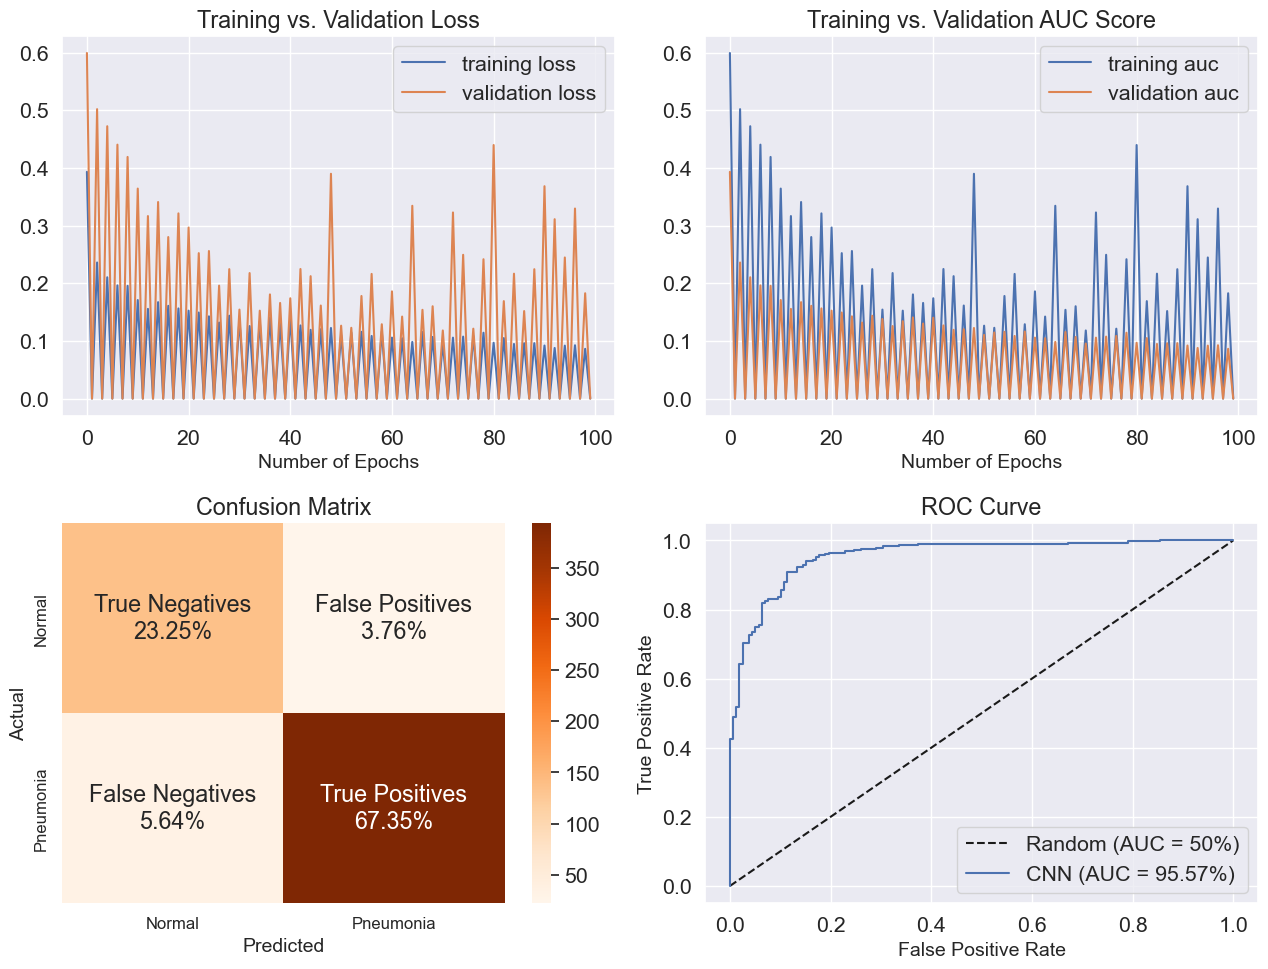

In [18]:
create_charts(cnn, cnn_model)

In [8]:
cnn = Sequential()

# Input layer (adjust based on your image size and channels)
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))  

# Convolutional layers with ReLU activation and MaxPooling
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))  # Add dropout for regularization

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# Flatten the output for feeding into dense layers
cnn.add(Flatten())

# Dense layers with ReLU activation
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dropout(0.5))  # Higher dropout for denser layers

# Output layer with sigmoid activation for binary classification (pneumonia vs. normal)
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC()])
cnn_model = cnn.fit(train_generator, 
                              steps_per_epoch = len(train_generator), 
                              epochs = 100, 
                              validation_data = val_generator,
                              validation_steps = len(val_generator), 
                              verbose=2)

Epoch 1/100


/Users/freazx/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 - 33s - 900ms/step - auc: 0.4823 - loss: 0.6584 - val_auc: 0.7450 - val_loss: 0.6274
Epoch 2/100
37/37 - 0s - 377us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/100


2024-03-30 21:42:06.334613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/freazx/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-30 21:42:06.339560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 32s - 875ms/step - auc: 0.7548 - loss: 0.5097 - val_auc: 0.9293 - val_loss: 0.3894
Epoch 4/100
37/37 - 0s - 213us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/100


2024-03-30 21:42:38.732408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:42:38.735159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 34s - 921ms/step - auc: 0.9166 - loss: 0.3681 - val_auc: 0.8070 - val_loss: 0.4562
Epoch 6/100
37/37 - 0s - 226us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/100


2024-03-30 21:43:12.819532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:43:12.822802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 36s - 961ms/step - auc: 0.9350 - loss: 0.3446 - val_auc: 0.9002 - val_loss: 0.3989
Epoch 8/100
37/37 - 0s - 241us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/100


2024-03-30 21:43:48.388775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:43:48.392220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 36s - 970ms/step - auc: 0.9468 - loss: 0.3266 - val_auc: 0.8602 - val_loss: 0.4106
Epoch 10/100
37/37 - 0s - 238us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/100


2024-03-30 21:44:24.308611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:44:24.311478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 37s - 992ms/step - auc: 0.9511 - loss: 0.3085 - val_auc: 0.8978 - val_loss: 0.3907
Epoch 12/100
37/37 - 0s - 235us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/100


2024-03-30 21:45:01.018001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:45:01.021274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 39s - 1s/step - auc: 0.9448 - loss: 0.2858 - val_auc: 0.9603 - val_loss: 0.2939
Epoch 14/100
37/37 - 0s - 315us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/100


2024-03-30 21:45:39.803160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:45:39.807999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 38s - 1s/step - auc: 0.9553 - loss: 0.2441 - val_auc: 0.9532 - val_loss: 0.2546
Epoch 16/100
37/37 - 0s - 254us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/100


2024-03-30 21:46:17.479202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:46:17.482861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 38s - 1s/step - auc: 0.9490 - loss: 0.2579 - val_auc: 0.9548 - val_loss: 0.2532
Epoch 18/100
37/37 - 0s - 235us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/100


2024-03-30 21:46:55.073418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:46:55.076484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 38s - 1s/step - auc: 0.9577 - loss: 0.2352 - val_auc: 0.9562 - val_loss: 0.2550
Epoch 20/100
37/37 - 0s - 245us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/100


2024-03-30 21:47:32.925199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:47:32.928448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 38s - 1s/step - auc: 0.9656 - loss: 0.2162 - val_auc: 0.9653 - val_loss: 0.2247
Epoch 22/100
37/37 - 0s - 312us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/100


2024-03-30 21:48:11.227799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:48:11.232269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9689 - loss: 0.2046 - val_auc: 0.9706 - val_loss: 0.2143
Epoch 24/100
37/37 - 0s - 470us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/100


2024-03-30 21:48:50.786266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:48:50.794648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 42s - 1s/step - auc: 0.9698 - loss: 0.2018 - val_auc: 0.9727 - val_loss: 0.2100
Epoch 26/100
37/37 - 0s - 296us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/100


2024-03-30 21:49:32.905116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:49:32.909143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9708 - loss: 0.1971 - val_auc: 0.9751 - val_loss: 0.1966
Epoch 28/100
37/37 - 0s - 259us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/100


2024-03-30 21:50:12.690147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:50:12.694030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9745 - loss: 0.1879 - val_auc: 0.9725 - val_loss: 0.1906
Epoch 30/100
37/37 - 0s - 291us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/100


2024-03-30 21:50:53.043665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:50:53.047482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9744 - loss: 0.1859 - val_auc: 0.9692 - val_loss: 0.1991
Epoch 32/100
37/37 - 0s - 274us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/100


2024-03-30 21:51:34.379823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:51:34.383600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 42s - 1s/step - auc: 0.9761 - loss: 0.1818 - val_auc: 0.9700 - val_loss: 0.1892
Epoch 34/100
37/37 - 0s - 277us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/100


2024-03-30 21:52:16.479430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:52:16.483336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9764 - loss: 0.1800 - val_auc: 0.9746 - val_loss: 0.1981
Epoch 36/100
37/37 - 0s - 281us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/100


2024-03-30 21:52:56.781015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:52:56.784654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9762 - loss: 0.1779 - val_auc: 0.9789 - val_loss: 0.1827
Epoch 38/100
37/37 - 0s - 252us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/100


2024-03-30 21:53:37.428634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:53:37.432102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 39s - 1s/step - auc: 0.9767 - loss: 0.1771 - val_auc: 0.9748 - val_loss: 0.1838
Epoch 40/100
37/37 - 0s - 265us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/100


2024-03-30 21:54:16.473817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:54:16.477375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9782 - loss: 0.1676 - val_auc: 0.9786 - val_loss: 0.1694
Epoch 42/100
37/37 - 0s - 252us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/100


2024-03-30 21:54:56.410179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:54:56.413363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9757 - loss: 0.1826 - val_auc: 0.9785 - val_loss: 0.1868
Epoch 44/100
37/37 - 0s - 312us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/100


2024-03-30 21:55:36.107211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:55:36.111924: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9816 - loss: 0.1592 - val_auc: 0.9779 - val_loss: 0.1815
Epoch 46/100
37/37 - 0s - 251us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/100


2024-03-30 21:56:16.281928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:56:16.285080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9791 - loss: 0.1665 - val_auc: 0.9791 - val_loss: 0.1687
Epoch 48/100
37/37 - 0s - 238us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/100


2024-03-30 21:56:56.224636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:56:56.228274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 42s - 1s/step - auc: 0.9798 - loss: 0.1654 - val_auc: 0.9666 - val_loss: 0.2360
Epoch 50/100
37/37 - 0s - 280us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/100


2024-03-30 21:57:37.886867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:57:37.891000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9811 - loss: 0.1594 - val_auc: 0.9809 - val_loss: 0.1578
Epoch 52/100
37/37 - 0s - 272us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/100


2024-03-30 21:58:18.353346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:58:18.356691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9823 - loss: 0.1577 - val_auc: 0.9819 - val_loss: 0.1554
Epoch 54/100
37/37 - 0s - 295us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/100


2024-03-30 21:58:58.787281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:58:58.791579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9807 - loss: 0.1601 - val_auc: 0.9801 - val_loss: 0.1742
Epoch 56/100
37/37 - 0s - 261us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/100


2024-03-30 21:59:39.269818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 21:59:39.273433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9811 - loss: 0.1555 - val_auc: 0.9694 - val_loss: 0.1916
Epoch 58/100
37/37 - 0s - 272us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/100


2024-03-30 22:00:19.154001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:00:19.157439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9807 - loss: 0.1569 - val_auc: 0.9812 - val_loss: 0.1621
Epoch 60/100
37/37 - 0s - 262us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/100


2024-03-30 22:00:59.993587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:00:59.997436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9825 - loss: 0.1508 - val_auc: 0.9820 - val_loss: 0.1627
Epoch 62/100
37/37 - 0s - 243us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/100


2024-03-30 22:01:40.297512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:01:40.300957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9844 - loss: 0.1432 - val_auc: 0.9845 - val_loss: 0.1539
Epoch 64/100
37/37 - 0s - 262us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/100


2024-03-30 22:02:20.772989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:02:20.776816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 39s - 1s/step - auc: 0.9854 - loss: 0.1381 - val_auc: 0.9822 - val_loss: 0.1805
Epoch 66/100
37/37 - 0s - 244us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/100


2024-03-30 22:02:59.629047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:02:59.632115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 38s - 1s/step - auc: 0.9822 - loss: 0.1528 - val_auc: 0.9831 - val_loss: 0.1500
Epoch 68/100
37/37 - 0s - 241us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/100


2024-03-30 22:03:37.620072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:03:37.623110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 38s - 1s/step - auc: 0.9834 - loss: 0.1453 - val_auc: 0.9840 - val_loss: 0.1416
Epoch 70/100
37/37 - 0s - 232us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/100


2024-03-30 22:04:15.772895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:04:15.776070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9845 - loss: 0.1430 - val_auc: 0.9835 - val_loss: 0.1514
Epoch 72/100
37/37 - 0s - 356us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/100


2024-03-30 22:04:56.937622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:04:56.942113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9863 - loss: 0.1363 - val_auc: 0.9871 - val_loss: 0.1288
Epoch 74/100
37/37 - 0s - 304us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/100


2024-03-30 22:05:37.297181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:05:37.301631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9878 - loss: 0.1310 - val_auc: 0.9887 - val_loss: 0.1274
Epoch 76/100
37/37 - 0s - 240us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/100


2024-03-30 22:06:17.065340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:06:17.068299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9878 - loss: 0.1267 - val_auc: 0.9869 - val_loss: 0.1345
Epoch 78/100
37/37 - 0s - 290us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/100


2024-03-30 22:06:57.090210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:06:57.094449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 40s - 1s/step - auc: 0.9887 - loss: 0.1236 - val_auc: 0.9889 - val_loss: 0.1391
Epoch 80/100
37/37 - 0s - 221us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/100


2024-03-30 22:07:37.572540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:07:37.575474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9861 - loss: 0.1368 - val_auc: 0.9884 - val_loss: 0.1215
Epoch 82/100
37/37 - 0s - 254us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/100


2024-03-30 22:08:18.510460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:08:18.513882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9885 - loss: 0.1211 - val_auc: 0.9849 - val_loss: 0.1389
Epoch 84/100
37/37 - 0s - 258us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/100


2024-03-30 22:08:59.355668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:08:59.359222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9871 - loss: 0.1327 - val_auc: 0.9902 - val_loss: 0.1189
Epoch 86/100
37/37 - 0s - 241us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/100


2024-03-30 22:09:39.973592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:09:39.977115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9877 - loss: 0.1261 - val_auc: 0.9877 - val_loss: 0.1375
Epoch 88/100
37/37 - 0s - 265us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/100


2024-03-30 22:10:20.561403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:10:20.564704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9881 - loss: 0.1268 - val_auc: 0.9883 - val_loss: 0.1298
Epoch 90/100
37/37 - 0s - 227us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/100


2024-03-30 22:11:01.419637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:11:01.422954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9879 - loss: 0.1249 - val_auc: 0.9892 - val_loss: 0.1215
Epoch 92/100
37/37 - 0s - 252us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/100


2024-03-30 22:11:42.485582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:11:42.489124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 41s - 1s/step - auc: 0.9879 - loss: 0.1282 - val_auc: 0.9877 - val_loss: 0.1344
Epoch 94/100
37/37 - 0s - 313us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/100


2024-03-30 22:12:23.597449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:12:23.601948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 42s - 1s/step - auc: 0.9864 - loss: 0.1297 - val_auc: 0.9898 - val_loss: 0.1193
Epoch 96/100
37/37 - 0s - 248us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/100


2024-03-30 22:13:05.309650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:13:05.312883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 42s - 1s/step - auc: 0.9877 - loss: 0.1280 - val_auc: 0.9822 - val_loss: 0.1501
Epoch 98/100
37/37 - 0s - 328us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/100


2024-03-30 22:13:47.135563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:13:47.139928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


37/37 - 42s - 1s/step - auc: 0.9889 - loss: 0.1164 - val_auc: 0.9852 - val_loss: 0.1316
Epoch 100/100
37/37 - 0s - 250us/step - auc: 0.0000e+00 - loss: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-30 22:14:28.734091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 22:14:28.737166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step
[Summary Statistics]
Accuracy = 93.50% | Precision = 93.71% | Recall = 97.66% | Specificity = 82.28% | F1 Score = 95.64%


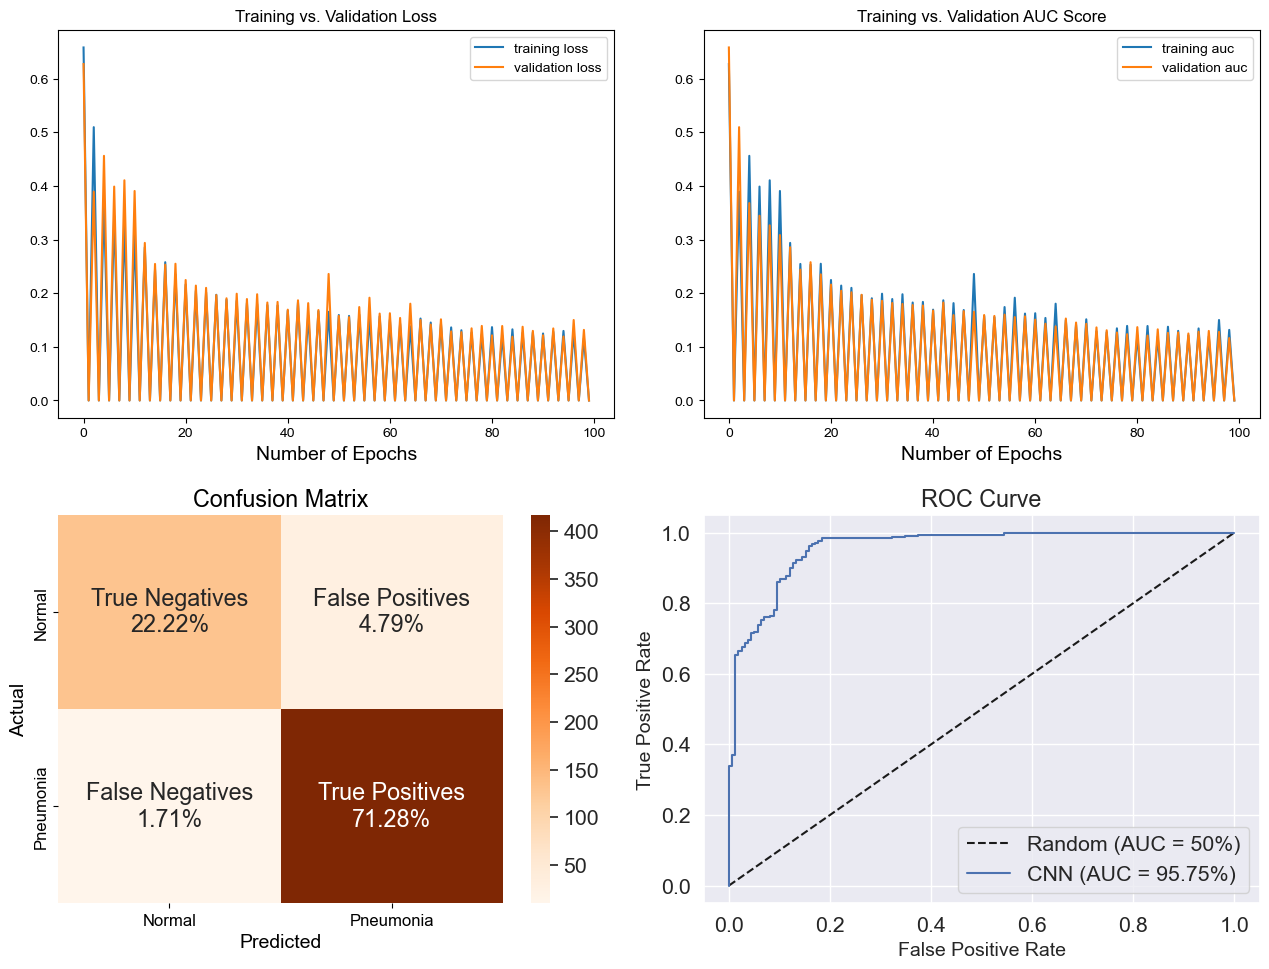

In [9]:
create_charts(cnn, cnn_model)